In [1]:
from google.colab import files
uploaded = files.upload()

Saving Data_Scientist_Interview_Task (1).xlsx to Data_Scientist_Interview_Task (1).xlsx


In [23]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
from prettytable import PrettyTable
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [24]:
data = pd.read_excel("Data_Scientist_Interview_Task (1).xlsx", sheet_name="Data",
                     keep_default_na=False) # since N/A corresponds to not applicable
print(data.info())
pd.concat([data.head(), data.tail()])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7691 entries, 0 to 7690
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Claim Number                  7691 non-null   int64  
 1   date_of_loss                  7691 non-null   object 
 2   Notifier                      7691 non-null   object 
 3   Loss_code                     7691 non-null   object 
 4   Loss_description              7691 non-null   object 
 5   Notification_period           7691 non-null   int64  
 6   Inception_to_loss             7691 non-null   int64  
 7   Location_of_incident          7691 non-null   object 
 8   Weather_conditions            7691 non-null   object 
 9   Vehicle_mobile                7691 non-null   object 
 10  Time_hour                     7691 non-null   int64  
 11  Main_driver                   7691 non-null   object 
 12  PH_considered_TP_at_fault     7691 non-null   object 
 13  Vec

Claim Number date_of_loss Notifier Loss_code   Loss_description  \
0                1   2003-04-15       PH     LD003  Head on collision   
1                2   2003-04-20      CNF     LD003  Head on collision   
2                3   2003-04-24      CNF     LD003  Head on collision   
3                4   2003-05-13      CNF     LD003  Head on collision   
4                5   2003-06-11      CNF     LD003  Head on collision   
7686          7687   2015-06-30    Other     LD003  Head on collision   
7687          7688   2015-06-30    Other     LD003  Head on collision   
7688          7689   2015-06-30    Other     LD003  Head on collision   
7689          7690   2015-06-30    Other     LD003  Head on collision   
7690          7691   2015-06-30    Other     LD003  Head on collision   

      Notification_period  Inception_to_loss Location_of_incident  \
0                      22                 13            Main Road   
1                       1                  9            Main Road   
2                       5                 17            Main Road   
3                       1                 23            Main Road   
4                       1                 48                Other   
7686                    1                 83            Main Road   
7687                    0                 25           Minor Road   
7688                    0                 60           Minor Road   
7689                    1                253           Minor Road   
7690                    0                266           Minor Road   

     Weather_conditions Vehicle_mobile  ...  TP_region_northw  \
0                NORMAL              Y  ...                 1   
1                   WET              Y  ...                 0   
2                   WET              Y  ...                 1   
3                   N/K              Y  ...                 0   
4                   N/K              N  ...                 0   
7686             NORMAL              N  ...                 1   
7687                N/A              Y  ...                 0   
7688             NORMAL              Y  ...                 0   
7689             NORMAL              N  ...                 0   
7690             NORMAL              Y  ...                 0   

     TP_region_outerldn TP_region_scotland  TP_region_southe  \
0                     0                  0                 0   
1                     0                  0                 1   
2                     0                  0                 0   
3                     0                  0                 0   
4                     0                  0                 0   
7686                  0                  0                 0   
7687                  0                  0                 0   
7688                  0                  0                 1   
7689                  0                  0                 0   
7690                  0                  0                 0   

      TP_region_southw  TP_region_wales  TP_region_westmid  \
0                    0                0                  0   
1                    0                0                  0   
2                    0                0                  0   
3                    0                0                  1   
4                    0                0                  0   
7686                 0                0                  0   
7687                 0                0                  0   
7688                 0                0                  0   
7689                 0                0                  0   
7690                 0                0                  0   

      TP_region_yorkshire      Incurred  Capped Incurred  
0                       0      0.000000         0.000000  
1                       0   2801.308013      2801.308013  
2                       0   1220.870390      1220.870390  
3                       0   3529.868026      3529.868026  
4                       0   3155.987923    

Things to note:

Small dataset, no need to optimise or chunk

Significant amount of columns

date_of_loss should be converted to datetime for future feature engineering



In [25]:
# Converting string date to datetime

data['date_of_loss'] = pd.to_datetime(data['date_of_loss'])

print(data['date_of_loss'].dtypes)
data.head()

datetime64[ns]


Claim Number date_of_loss Notifier Loss_code   Loss_description  \
0             1   2003-04-15       PH     LD003  Head on collision   
1             2   2003-04-20      CNF     LD003  Head on collision   
2             3   2003-04-24      CNF     LD003  Head on collision   
3             4   2003-05-13      CNF     LD003  Head on collision   
4             5   2003-06-11      CNF     LD003  Head on collision   

   Notification_period  Inception_to_loss Location_of_incident  \
0                   22                 13            Main Road   
1                    1                  9            Main Road   
2                    5                 17            Main Road   
3                    1                 23            Main Road   
4                    1                 48                Other   

  Weather_conditions Vehicle_mobile  ...  TP_region_northw TP_region_outerldn  \
0             NORMAL              Y  ...                 1                  0   
1                WET              Y  ...                 0                  0   
2                WET              Y  ...                 1                  0   
3                N/K              Y  ...                 0                  0   
4                N/K              N  ...                 0                  0   

  TP_region_scotland  TP_region_southe  TP_region_southw  TP_region_wales  \
0                  0                 0                 0                0   
1                  0                 1                 0                0   
2                  0                 0                 0                0   
3                  0                 0                 0                0   
4                  0                 0                 0                0   

   TP_region_westmid  TP_region_yorkshire     Incurred  Capped Incurred  
0                  0                    0     0.000000         0.000000  
1                  0                    0  2801.308013      2801.308013  
2                  0                    0  1220.870390      1220.870390  
3                  1                    0  3529.868026      3529.868026  
4                  0                    0  3155.987923      3155.987923  

[5 rows x 46 columns]

In [26]:
# Data summary
data_summary = data.describe(include='all').transpose()

# Compute mode for each column and take the first mode if there are multiple
mode_df = data.mode().iloc[0].to_frame().rename(columns={0: 'mode'})

# Merge mode with data summary
data_summary = data_summary.join(mode_df)

# Display the data summary
data_summary[['count', 'unique', 'mode', 'freq', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

data_summary\
    .style.bar(subset=['mean'], color=px.colors.qualitative.G10[2])\
    .background_gradient(subset=['std'], cmap='Blues')\
    .background_gradient(subset=['50%'], cmap='BuGn')


<ipython-input-26-f2b8b3aa31f9>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_summary = data.describe(include='all').transpose()


Things to note:

Loss code and loss description contain no unique values (as stated in the task)

Negative notification period

Mode of time hour is 8 o'clock; might be useful to engineer a peak/off-peak column and/or day/night column

TP_type_pass_multi and TP_type_insd_pass_front contains no unique values

There are some very low variance features like TP_type_pedestrian

Incurred column contains negative values and small number of extreme outliers based on mean, std and max



In [27]:
data = data.drop(columns=['Loss_code', 'Loss_description', 'Claim Number'])

In [28]:
# Don't expect any duplicates because of the claim number but just to check
data.drop_duplicates()
data.shape

(7691, 43)

In [29]:
# Count of unique values for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
unique_counts = data[categorical_columns].nunique().sort_values(ascending=False)

unique_counts

Location_of_incident         8
Notifier                     5
Weather_conditions           5
PH_considered_TP_at_fault    4
Vehicle_mobile               3
Main_driver                  3
dtype: int64

Manageable cardinality

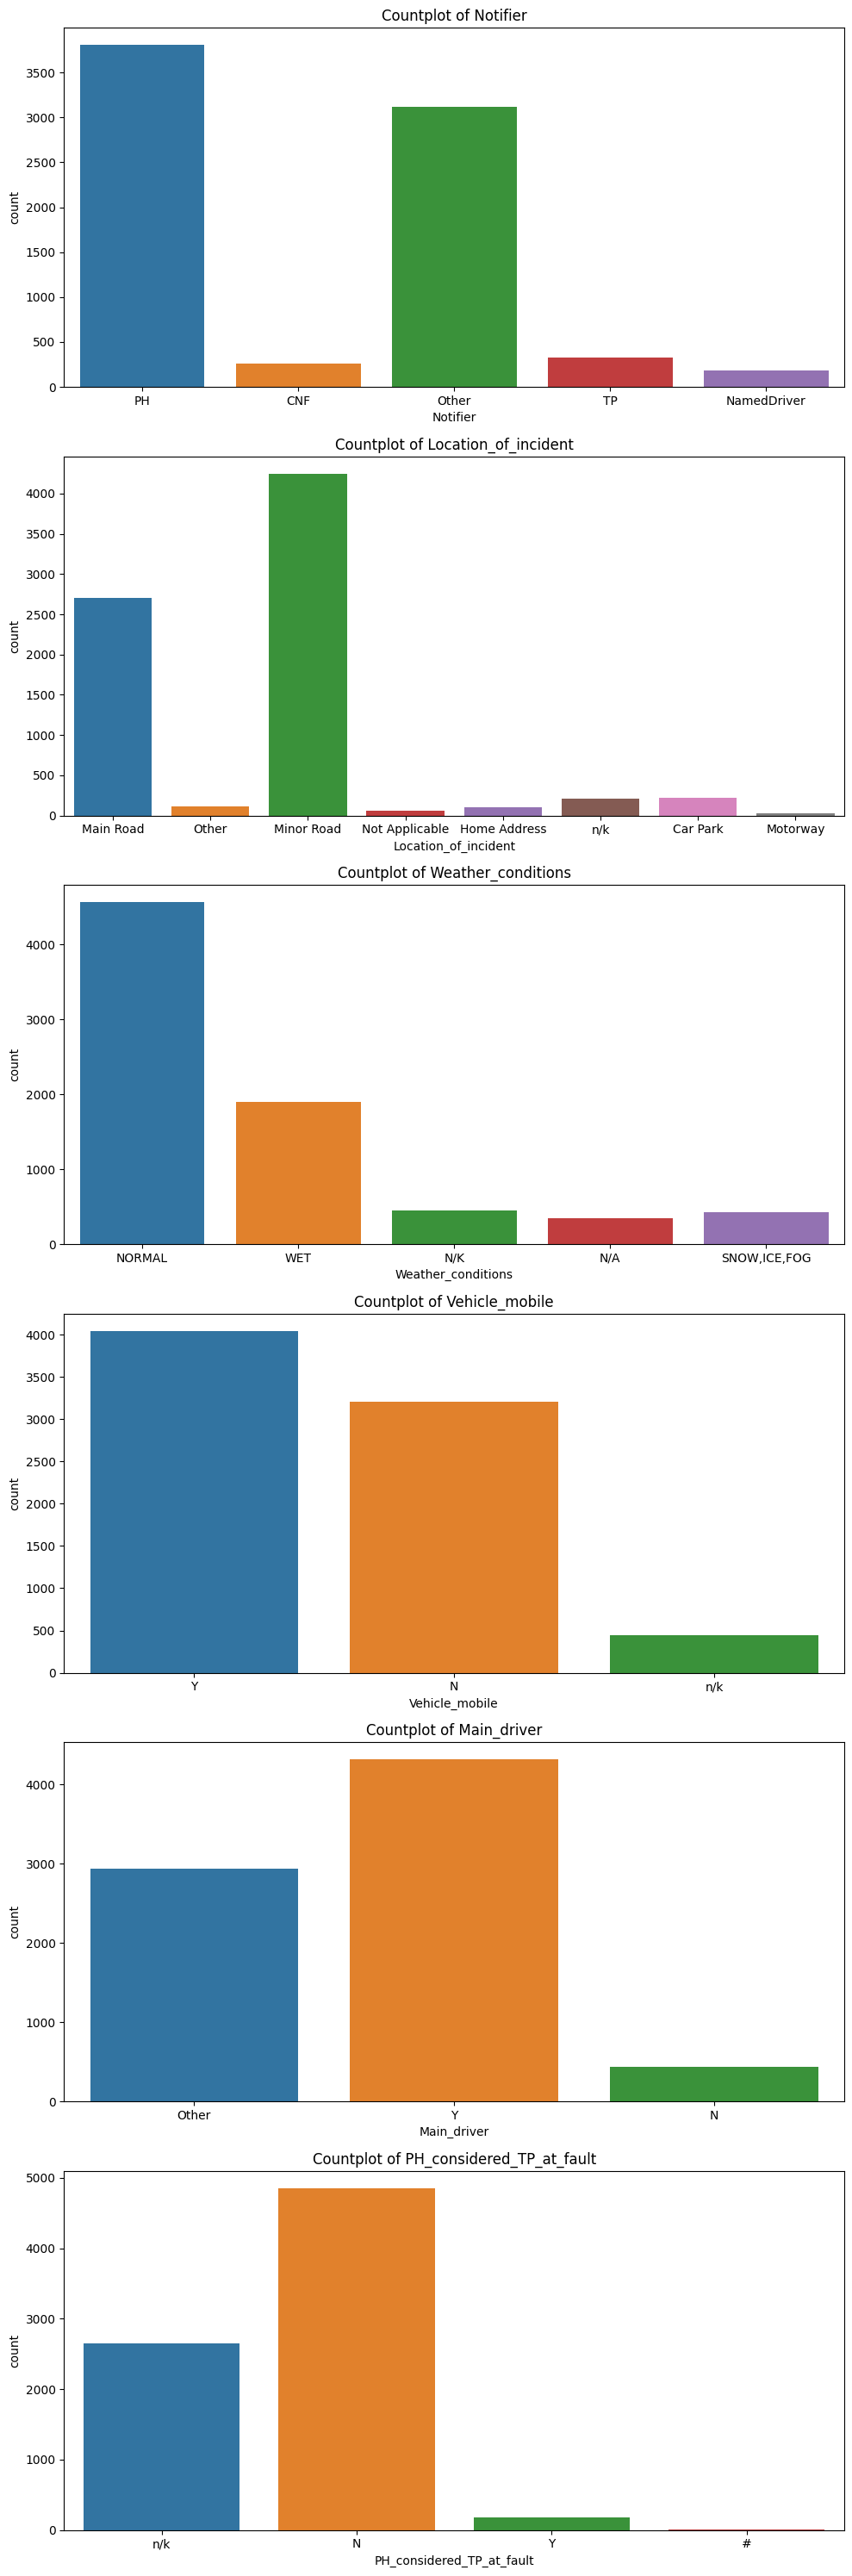

In [30]:
# Exclude 'Loss_code' and 'Loss_description'
cat_cols = data.select_dtypes(include=['object'])

# Set up the figure and axes
n_cols = len(cat_cols.columns)
fig, axes = plt.subplots(n_cols, 1, figsize=(10, 5 * n_cols))
for ax, col in zip(axes, cat_cols.columns):
    sns.countplot(data=data, x=col, ax=ax)
    ax.set_title(f"Countplot of {col}")

plt.tight_layout()
plt.show()

Things to note:

Location_of_incident: n/k corresponds to nan; transform 'Not Applicable' and 'Motorway' to 'Other' because they're both relatively small

Weather_conditions: 'N/K' to nan

Vehicle_mobile: 'n/k' to nan

PH_considered_TP_at_fault transform # into 'n/k'

Convert 'Vehicle_mobile' to binary for consistency

In [31]:
# Replace values in the 'Location of incident' column
data['Location_of_incident'] = data['Location_of_incident'].replace(['Not Applicable', 'Motorway'], 'Other')
data['Weather_conditions'] = data['Weather_conditions'].replace('N/K', np.nan)
data['PH_considered_TP_at_fault'] = data['PH_considered_TP_at_fault'].replace('#', 'n/k')

# Replace 'n/k' with NaN for multiple columns
cols_to_replace = ['Location_of_incident', 'Vehicle_mobile', 'PH_considered_TP_at_fault']
data[cols_to_replace] = data[cols_to_replace].replace('n/k', np.nan)

data['Vehicle_mobile'] = data['Vehicle_mobile'].map({'Y': 1, 'N': 0})
data['PH_considered_TP_at_fault'] = data['PH_considered_TP_at_fault'].map({'Y': 1, 'N': 0})


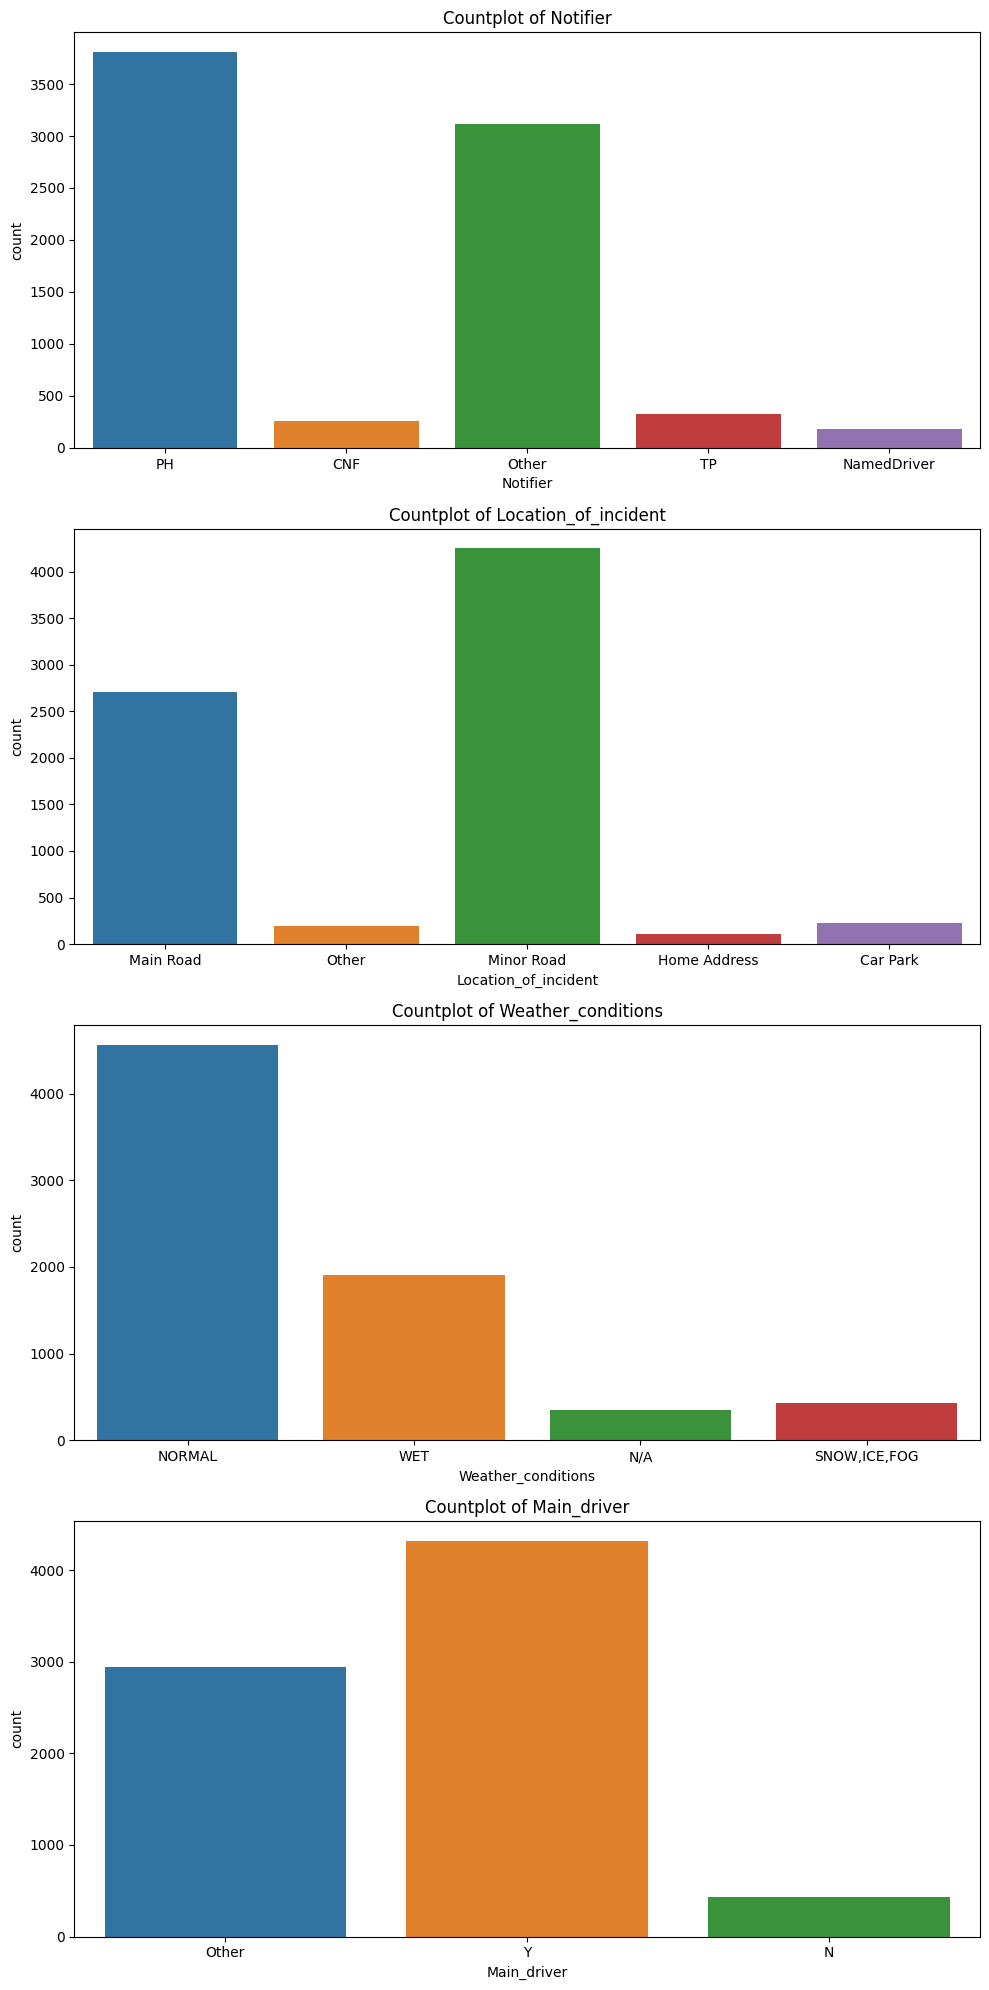

In [32]:
cat_cols = data.select_dtypes(include=['object'])

# Set up the figure and axes
n_cols = len(cat_cols.columns)
fig, axes = plt.subplots(n_cols, 1, figsize=(10, 5 * n_cols))
for ax, col in zip(axes, cat_cols.columns):
    sns.countplot(data=data, x=col, ax=ax)
    ax.set_title(f"Countplot of {col}")

plt.tight_layout()
plt.show()

<Axes: >

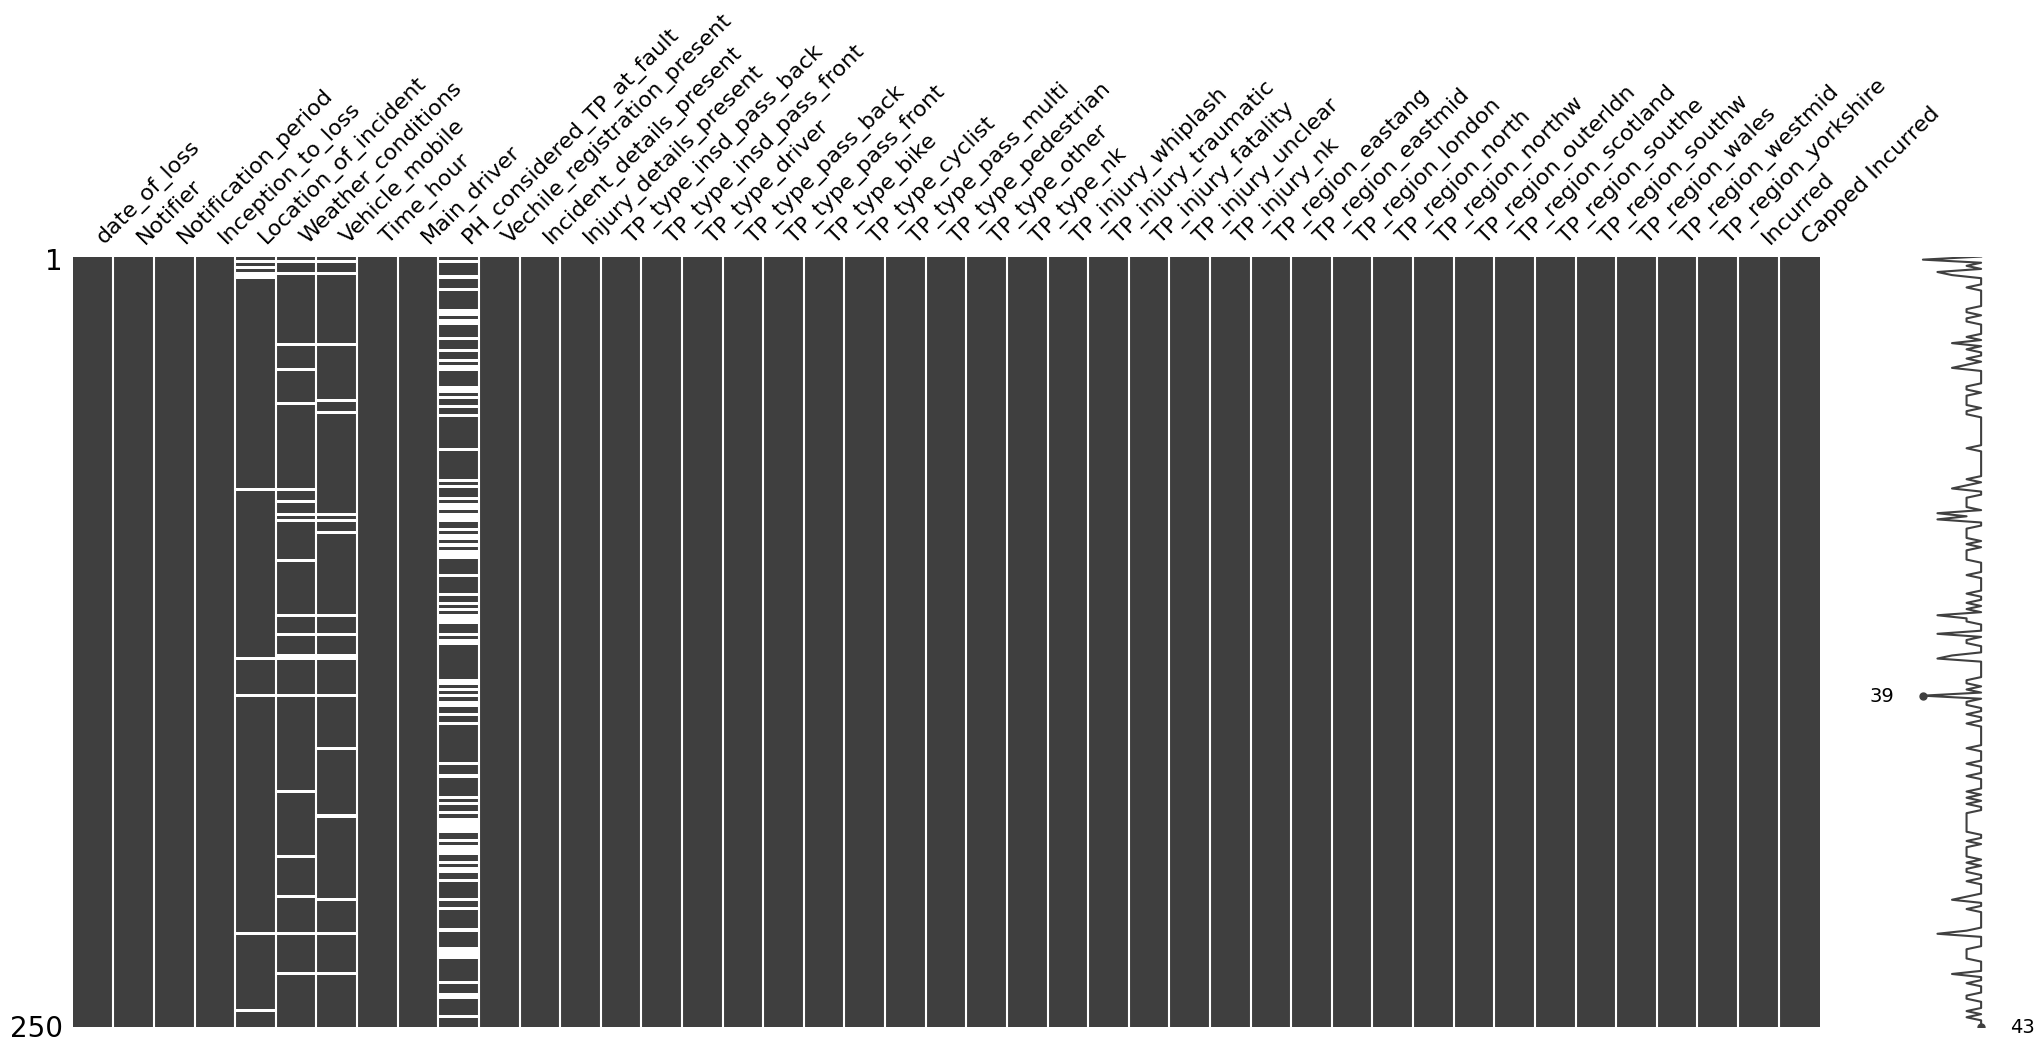

In [33]:
#Get & visualize missingness matrix
msno.matrix(data.sample(250))

In [34]:
table = PrettyTable()
table.field_names = ['Column Name', 'Data Type', 'Missing %']
for column in data.columns:
    data_type = str(data[column].dtype)
    non_null_count= 100-data[column].count()/data.shape[0]*100

    table.add_row([column, data_type, non_null_count])
print(table)

+------------------------------+----------------+-------------------+
|         Column Name          |   Data Type    |     Missing %     |
+------------------------------+----------------+-------------------+
|         date_of_loss         | datetime64[ns] |        0.0        |
|           Notifier           |     object     |        0.0        |
|     Notification_period      |     int64      |        0.0        |
|      Inception_to_loss       |     int64      |        0.0        |
|     Location_of_incident     |     object     | 2.769470810037717 |
|      Weather_conditions      |     object     | 5.850994669093751 |
|        Vehicle_mobile        |    float64     | 5.746976986087631 |
|          Time_hour           |     int64      |        0.0        |
|         Main_driver          |     object     |        0.0        |
|  PH_considered_TP_at_fault   |    float64     | 34.52086854765311 |
| Vechile_registration_present |     int64      |        0.0        |
|   Incident_details

Since a third of values are missing for PH_considered_TP_at_fault I will simply drop it

In [35]:
data = data.drop(columns=['PH_considered_TP_at_fault'])

In [36]:
# cast categorical columns as category instead of object
columns_to_cast = ['Notifier', 'Location_of_incident', 'Weather_conditions', 'Vehicle_mobile', 'Main_driver']

for col in columns_to_cast:
    data[col] = data[col].astype('category')


In [37]:
def get_season(date):
    if date.month in [12, 1, 2]:
        return 'winter'
    elif date.month in [3, 4, 5]:
        return 'spring'
    elif date.month in [6, 7, 8]:
        return 'summer'
    else:
        return 'autumn'
data['Season'] = data['date_of_loss'].apply(get_season)
data['Season'] = data['Season'].astype('category')

data['Workday'] = data['date_of_loss'].dt.dayofweek.apply(lambda x: 1 if 0 <= x <= 4 else 0)


data = data.drop(columns=['date_of_loss'])


In [38]:
table = PrettyTable()
table.field_names = ['Column Name', 'Data Type', 'Missing %']
for column in data.columns:
    data_type = str(data[column].dtype)
    non_null_count= 100-data[column].count()/data.shape[0]*100

    table.add_row([column, data_type, non_null_count])
print(table)

+------------------------------+-----------+-------------------+
|         Column Name          | Data Type |     Missing %     |
+------------------------------+-----------+-------------------+
|           Notifier           |  category |        0.0        |
|     Notification_period      |   int64   |        0.0        |
|      Inception_to_loss       |   int64   |        0.0        |
|     Location_of_incident     |  category | 2.769470810037717 |
|      Weather_conditions      |  category | 5.850994669093751 |
|        Vehicle_mobile        |  category | 5.746976986087631 |
|          Time_hour           |   int64   |        0.0        |
|         Main_driver          |  category |        0.0        |
| Vechile_registration_present |   int64   |        0.0        |
|   Incident_details_present   |   int64   |        0.0        |
|    Injury_details_present    |   int64   |        0.0        |
|    TP_type_insd_pass_back    |   int64   |        0.0        |
|   TP_type_insd_pass_fro

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coeffic

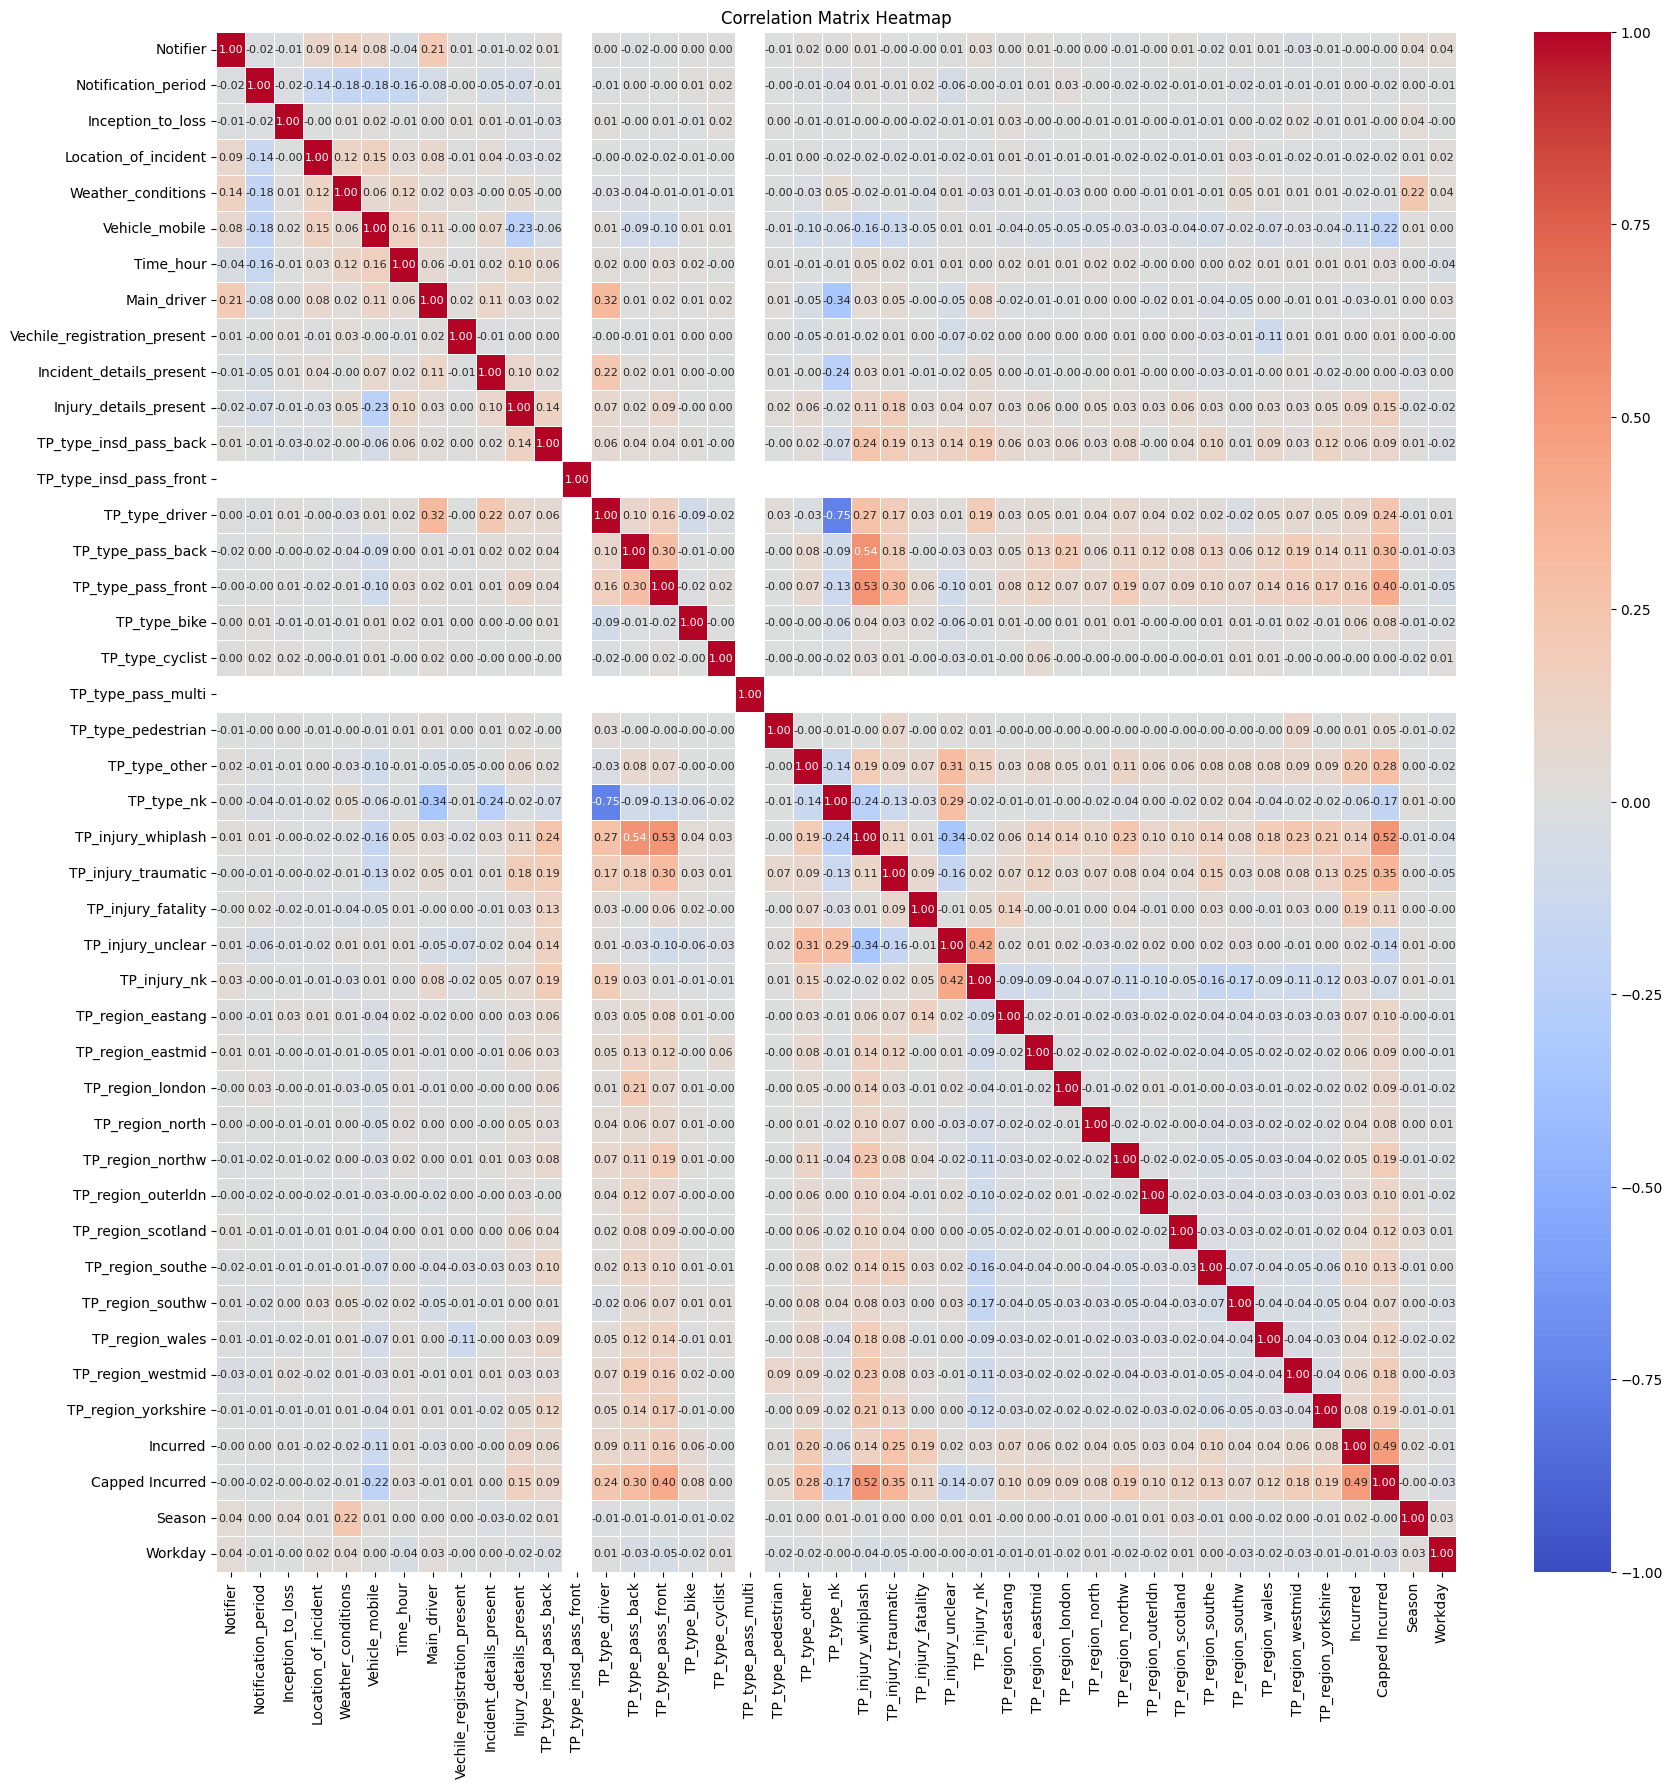

In [39]:
from scipy.stats import pointbiserialr, chi2_contingency

# Define the Cramér's V function
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# Compute correlation matrix for the dataframe 'data'
corr_matrix = pd.DataFrame(np.ones((data.shape[1], data.shape[1])), columns=data.columns, index=data.columns)

for col1 in data.columns:
    for col2 in data.columns:
        if col1 != col2:
            if data[col1].dtype.name == 'category' and data[col2].dtype.name == 'category':  # Categorical-Categorical
                corr_matrix.loc[col1, col2] = cramers_v(data[col1], data[col2])
            elif (data[col1].dtype == np.float64 or data[col1].dtype == np.int64) and (data[col2].dtype == np.float64 or data[col2].dtype == np.int64):  # Continuous-Continuous
                corr_matrix.loc[col1, col2] = data[col1].corr(data[col2])
            else:  # Continuous-Categorical
                if data[col1].dtype.name == 'category':
                    categ_col = col1
                    cont_col = col2
                else:
                    categ_col = col2
                    cont_col = col1
                corr_matrix.loc[col1, col2] = pointbiserialr(data[cont_col], data[categ_col].astype('category').cat.codes)[0]

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=.5, annot_kws={"size": 8})
plt.title("Correlation Matrix Heatmap")
plt.show()

Wanted to see correlations to check for suitability of iterative imputation

Location_of_incident - very weak correlation
Weather_conditions - ok-ish correlation
Vehicle_mobile - very weak correlation

As a side note, seems to be a good correlation with the target class

In [40]:

data_before_imputation = data.copy()

# Impute the missing values using the imputer
# Convert all categorical columns to their integer codes for imputation
categorical_cols = ['Notifier', 'Location_of_incident', 'Weather_conditions', 'Vehicle_mobile',
                    'Main_driver', 'Season']


code_mapping = {}

from sklearn.impute import KNNImputer

# Use KNNImputer for imputation
knn_imputer = KNNImputer(n_neighbors=5)

# Convert all categorical columns to their integer codes for imputation and store the mapping
for col in categorical_cols:
    data[f'{col}_code'] = data[col].cat.codes.replace(-1, np.nan)  # NaN for missing values
    code_mapping[col] = dict(enumerate(data[col].cat.categories))

# Update cols_to_impute based on the new data with code columns
missing_data = data.isnull().sum()
cols_to_impute = missing_data[missing_data > 0].index.tolist()

# Update impute_cols list to only contain numerical or coded columns
all_numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
all_numeric_cols = [col for col in all_numeric_cols if col not in ['Incurred', 'Capped Incurred']] # to avoid data leakage
all_code_cols = [f"{col}_code" for col in categorical_cols]
impute_cols = list(set(cols_to_impute + all_numeric_cols + all_code_cols))

# Ensure that impute_cols contains only the integer code columns for categorical variables
impute_cols = [f"{col}_code" if col in categorical_cols else col for col in impute_cols]

data[impute_cols] = knn_imputer.fit_transform(data[impute_cols])

# Convert the imputed values back to their original categories
for col in categorical_cols:
    if f'{col}_code' in data.columns:
        data[f'{col}_code'] = data[f'{col}_code'].round().astype(int)  # Round and convert to int
        data[col] = data[f'{col}_code'].map(code_mapping[col]).astype('category')  # Map back to original category
        data.drop(f'{col}_code', axis=1, inplace=True)

# Check if there are still missing values after KNN imputation
updated_missing_data = data.isnull().sum()
updated_missing_data_cols = updated_missing_data[updated_missing_data > 0].index.tolist()
updated_missing_data_cols




[]

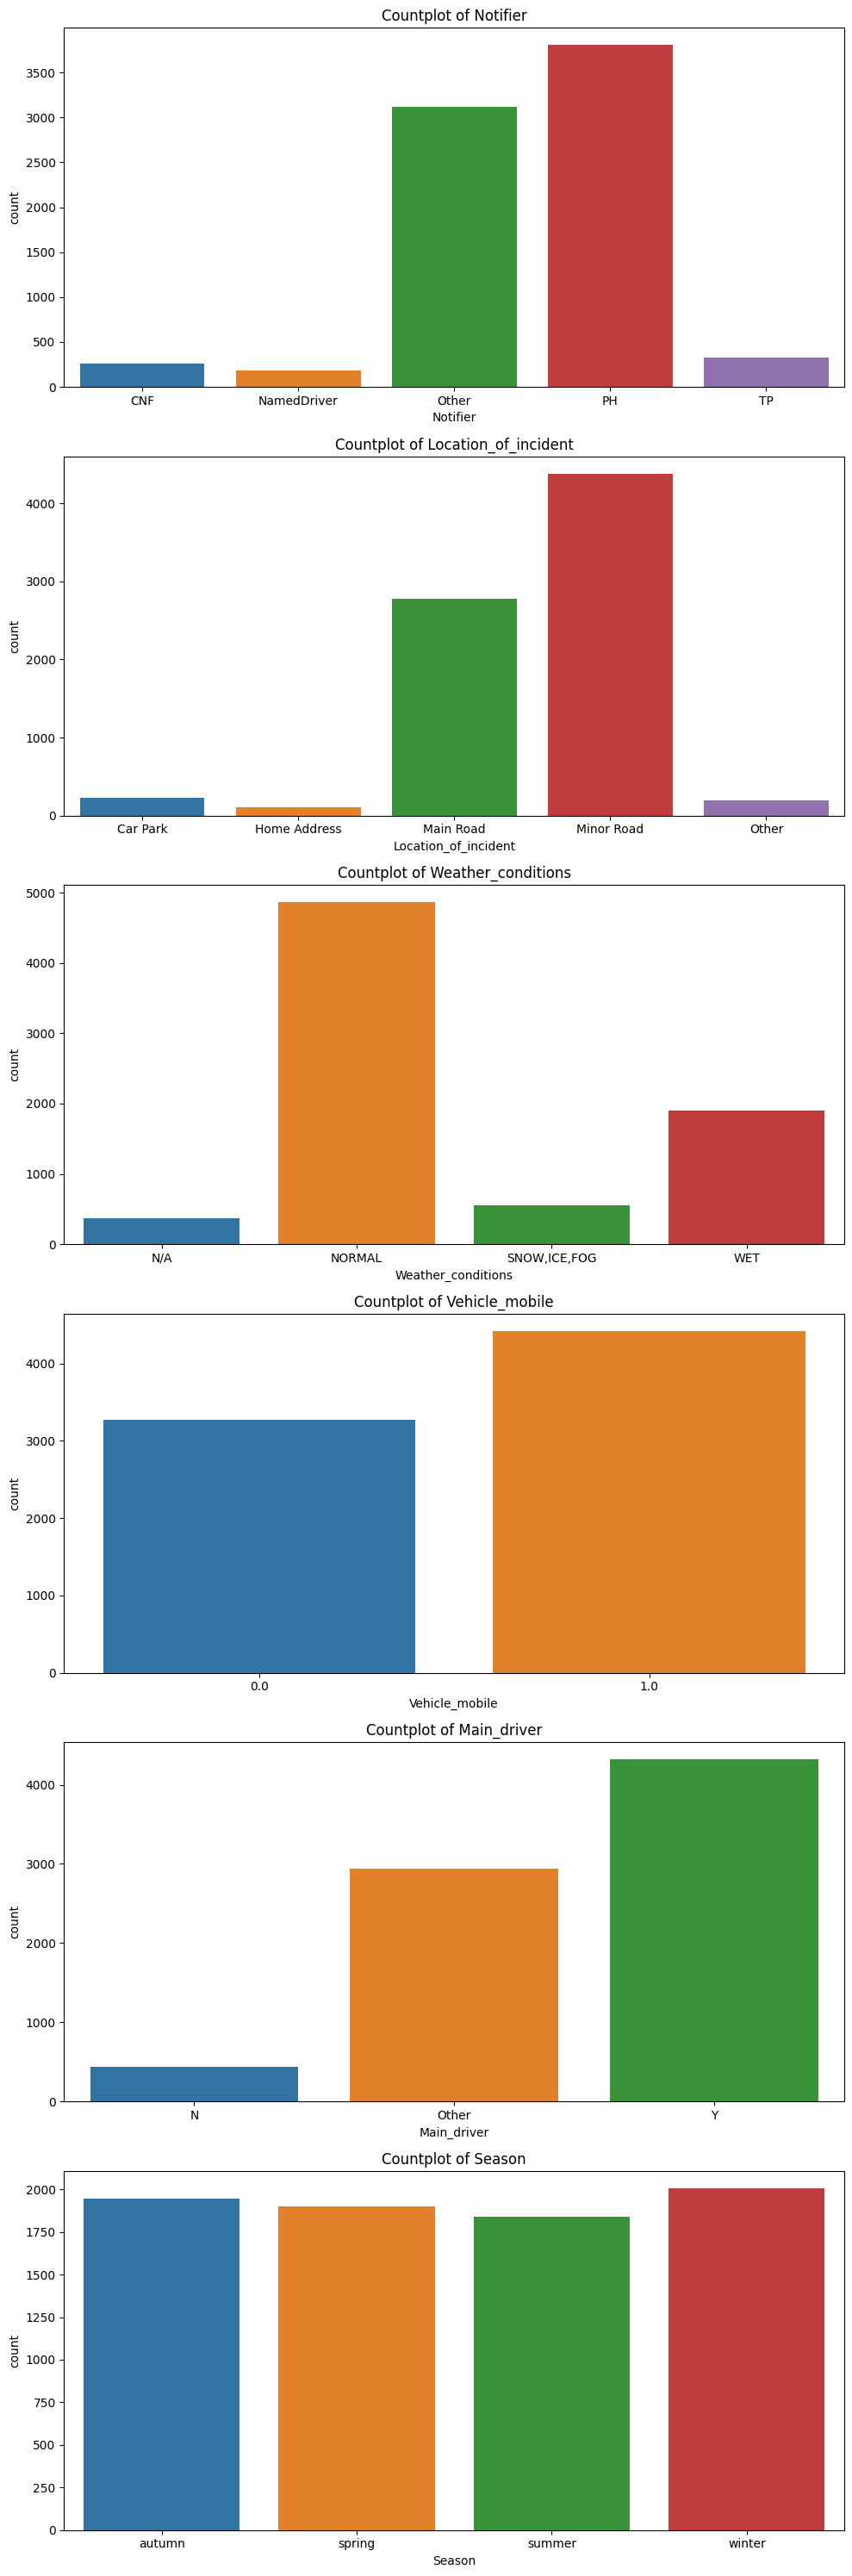

In [41]:
# Exclude 'Loss_code' and 'Loss_description'
# cast categorical columns as category instead of object
columns_to_cast = ['Notifier', 'Location_of_incident', 'Weather_conditions', 'Vehicle_mobile', 'Main_driver', 'Season']

for col in columns_to_cast:
    data[col] = data[col].astype('category')
cat_cols = data.select_dtypes(include=['category'])

# Set up the figure and axes
n_cols = len(cat_cols.columns)
fig, axes = plt.subplots(n_cols, 1, figsize=(10, 5 * n_cols))
for ax, col in zip(axes, cat_cols.columns):
    sns.countplot(data=data, x=col, ax=ax)
    ax.set_title(f"Countplot of {col}")

plt.tight_layout()
plt.show()

In [42]:
table = PrettyTable()
table.field_names = ['Column Name', 'Data Type', 'Missing %']
for column in data.columns:
    data_type = str(data[column].dtype)
    non_null_count= 100-data[column].count()/data.shape[0]*100

    table.add_row([column, data_type, non_null_count])
print(table)

+------------------------------+-----------+-----------+
|         Column Name          | Data Type | Missing % |
+------------------------------+-----------+-----------+
|           Notifier           |  category |    0.0    |
|     Notification_period      |  float64  |    0.0    |
|      Inception_to_loss       |  float64  |    0.0    |
|     Location_of_incident     |  category |    0.0    |
|      Weather_conditions      |  category |    0.0    |
|        Vehicle_mobile        |  category |    0.0    |
|          Time_hour           |  float64  |    0.0    |
|         Main_driver          |  category |    0.0    |
| Vechile_registration_present |  float64  |    0.0    |
|   Incident_details_present   |  float64  |    0.0    |
|    Injury_details_present    |  float64  |    0.0    |
|    TP_type_insd_pass_back    |  float64  |    0.0    |
|   TP_type_insd_pass_front    |  float64  |    0.0    |
|        TP_type_driver        |  float64  |    0.0    |
|      TP_type_pass_back       

In [43]:
# Create a dictionary to store the proportions of each category before and after imputation for each column
cols_to_impute = ['Location_of_incident', 'Weather_conditions', 'Vehicle_mobile']
# Create a dictionary to store the counts of each category before and after imputation for each column
counts_comparison = {}

# For each categorical column with missing values
for col in categorical_cols:
    if col in cols_to_impute:
        # Counts before imputation
        before_imputation = data_before_imputation[col].value_counts()

        # Counts after imputation
        after_imputation = data[col].value_counts()

        # Store the counts in the dictionary
        counts_comparison[col] = pd.concat([before_imputation, after_imputation], axis=1,
                                           keys=['Before Imputation', 'After Imputation']).fillna(0)

counts_comparison


{'Location_of_incident':               Before Imputation  After Imputation
 Minor Road                 4249              4381
 Main Road                  2702              2780
 Car Park                    225               225
 Other                       198               199
 Home Address                104               106,
 'Weather_conditions':               Before Imputation  After Imputation
 NORMAL                     4564              4863
 WET                        1903              1905
 SNOW,ICE,FOG                429               556
 N/A                         345               367,
 'Vehicle_mobile':      Before Imputation  After Imputation
 1.0               4046              4421
 0.0               3203              3270}

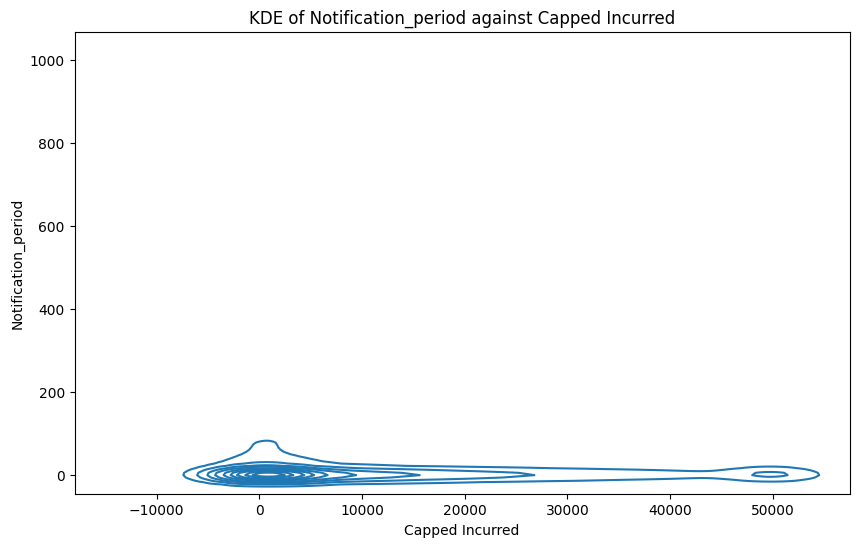

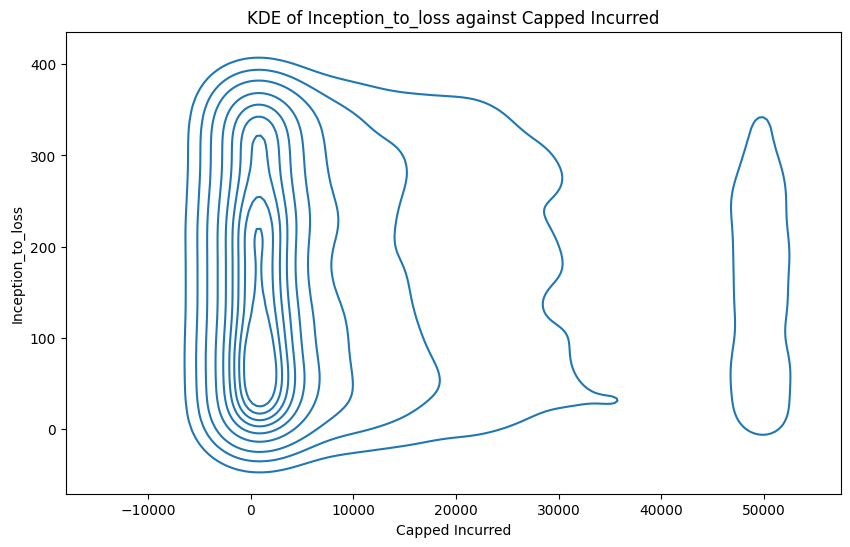

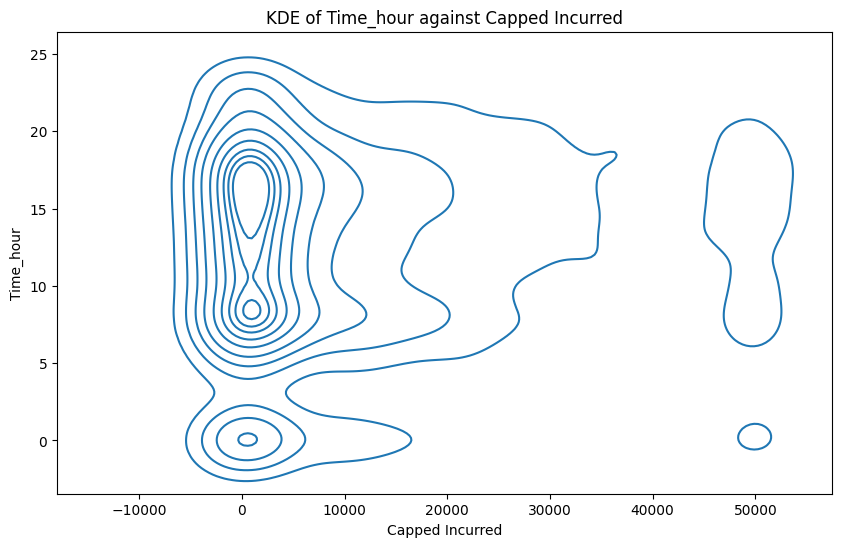

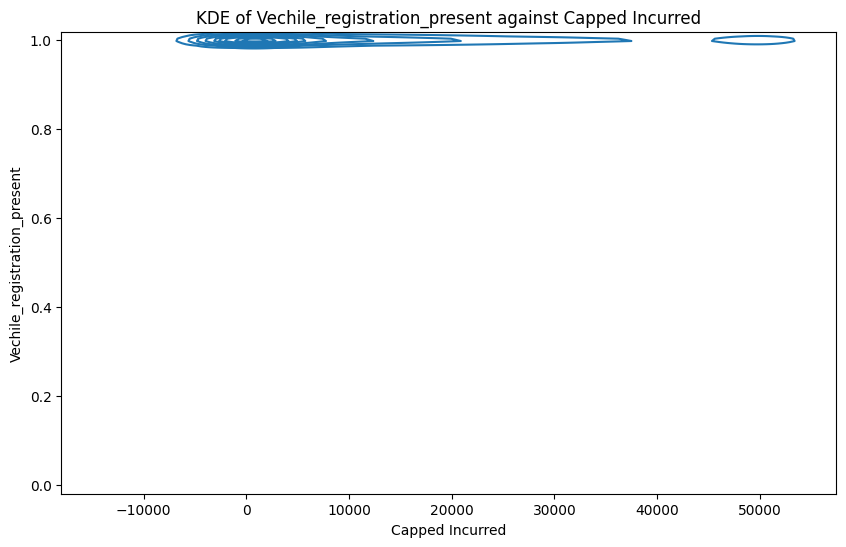

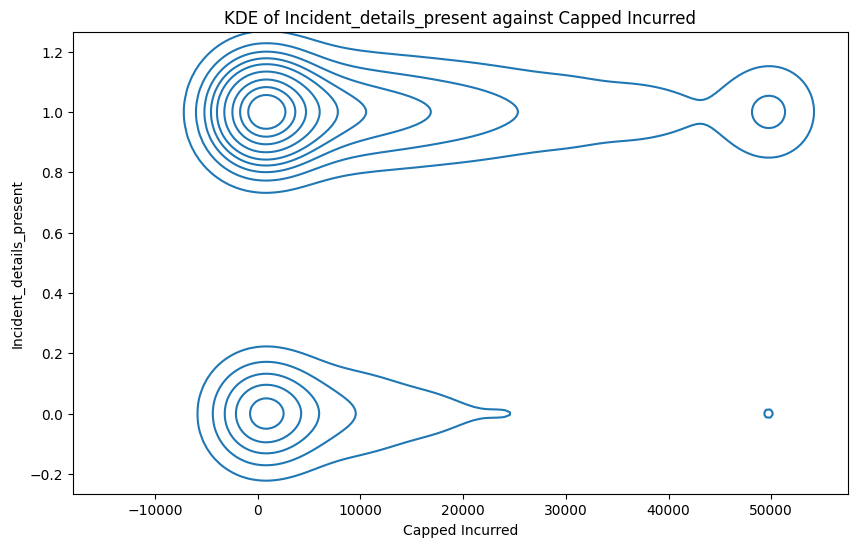

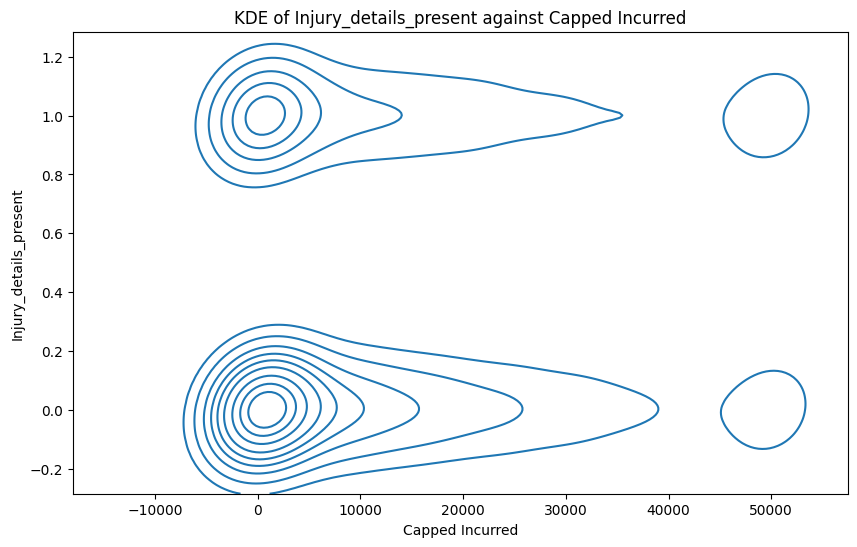

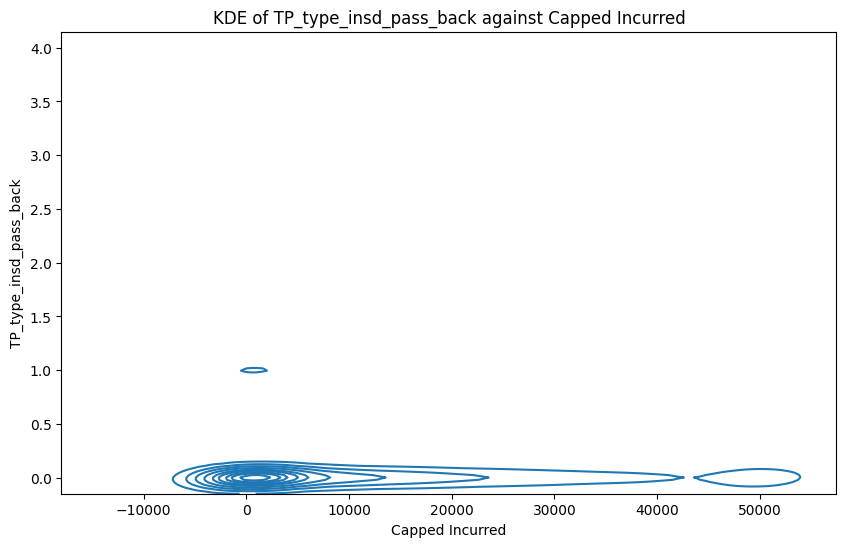

<ipython-input-49-cf65d180c69c>:12: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data, x="Capped Incurred", y=col)


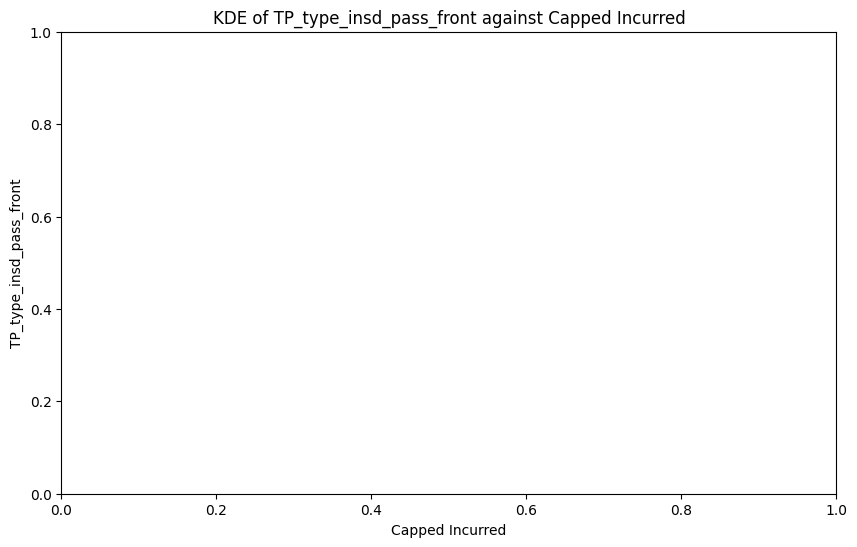

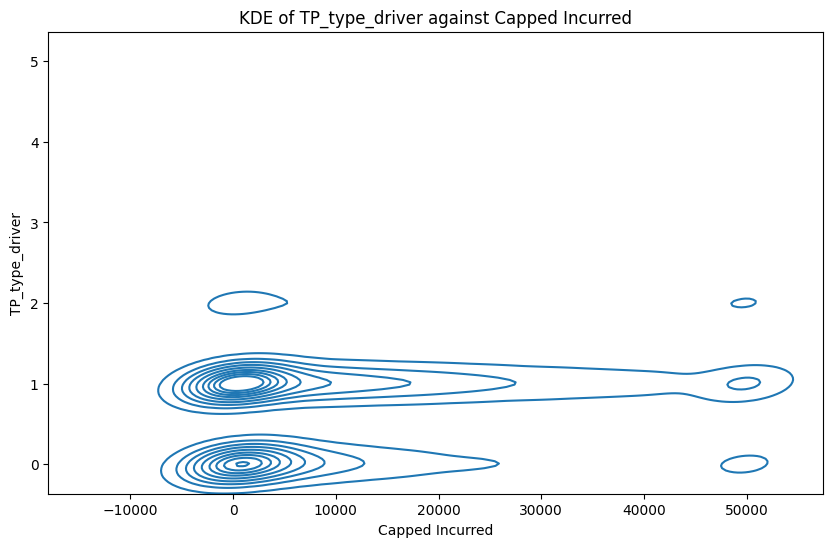

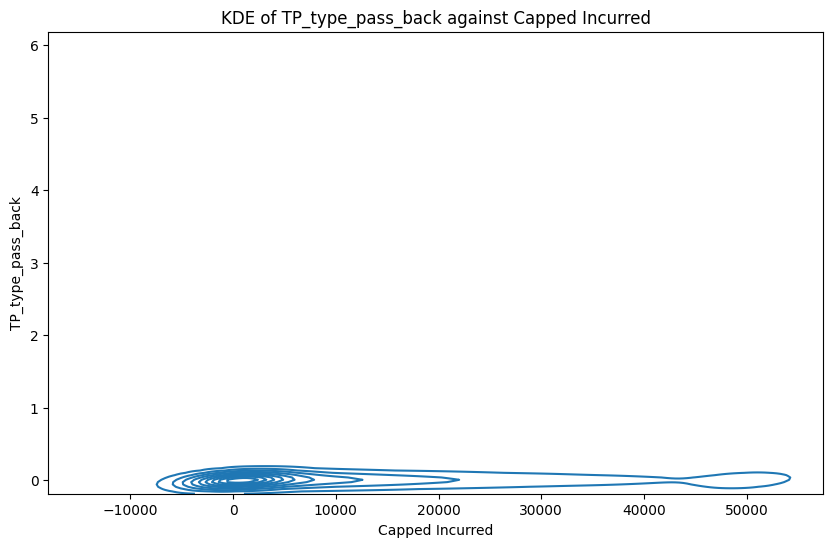

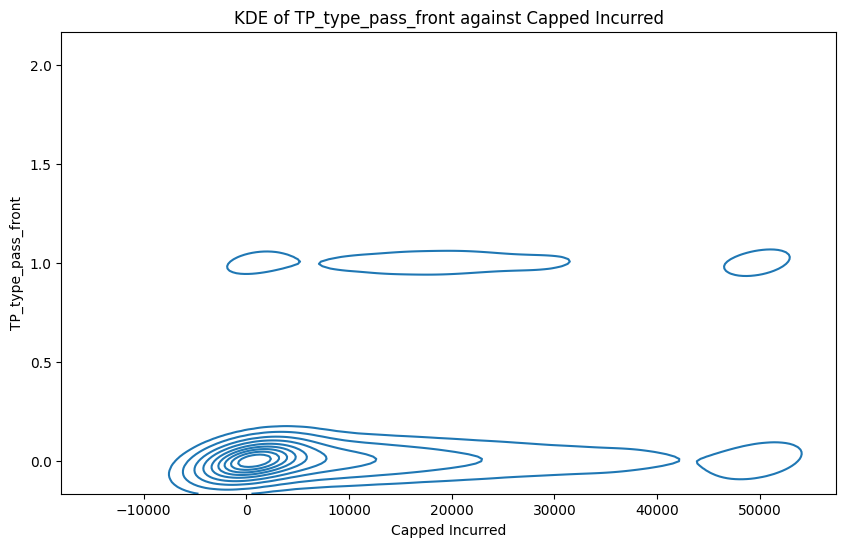

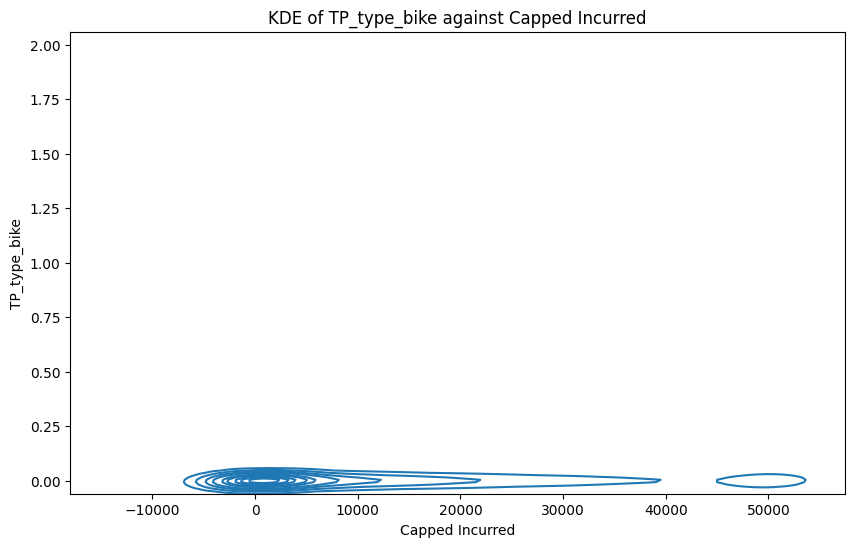

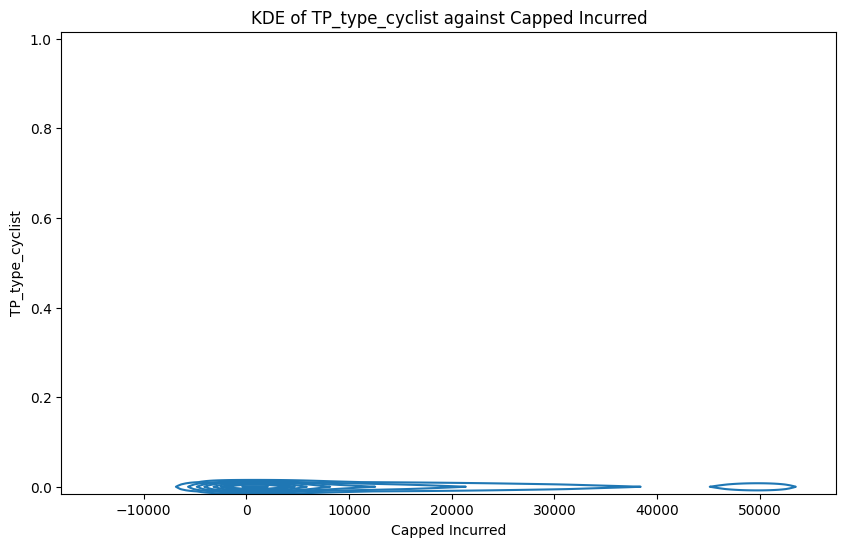

<ipython-input-49-cf65d180c69c>:12: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data, x="Capped Incurred", y=col)


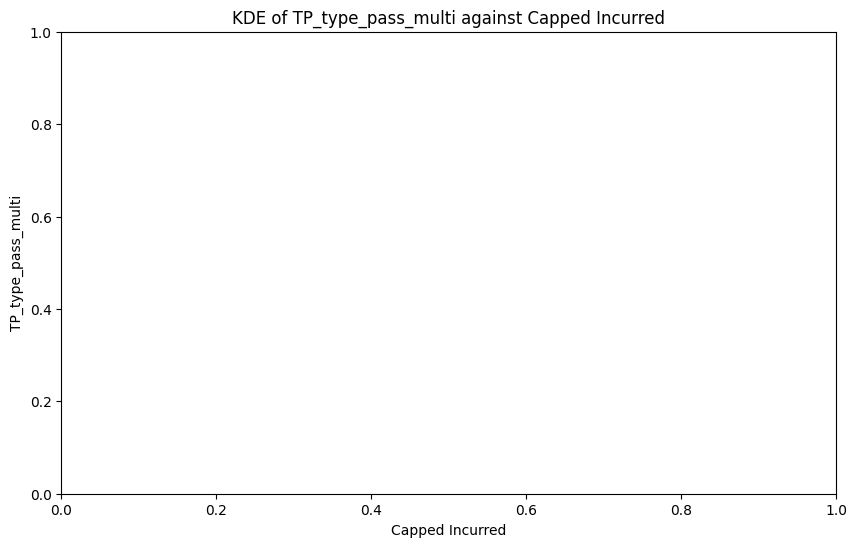

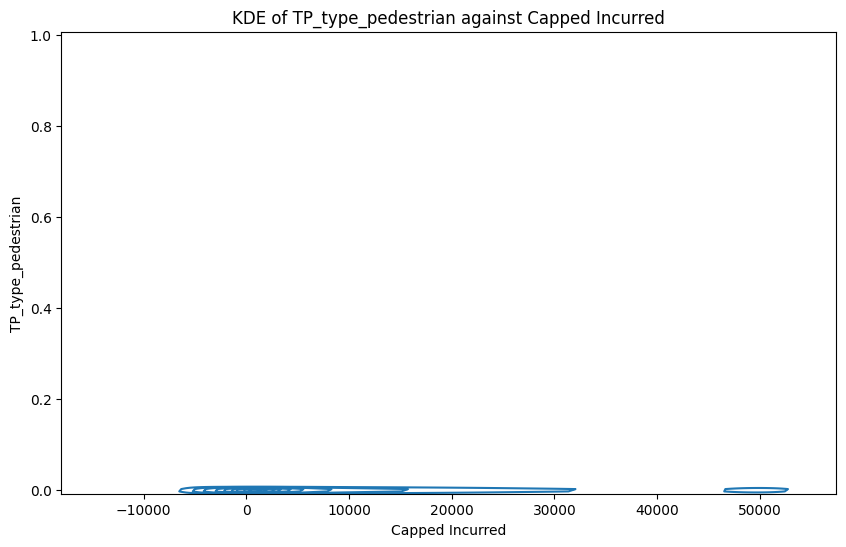

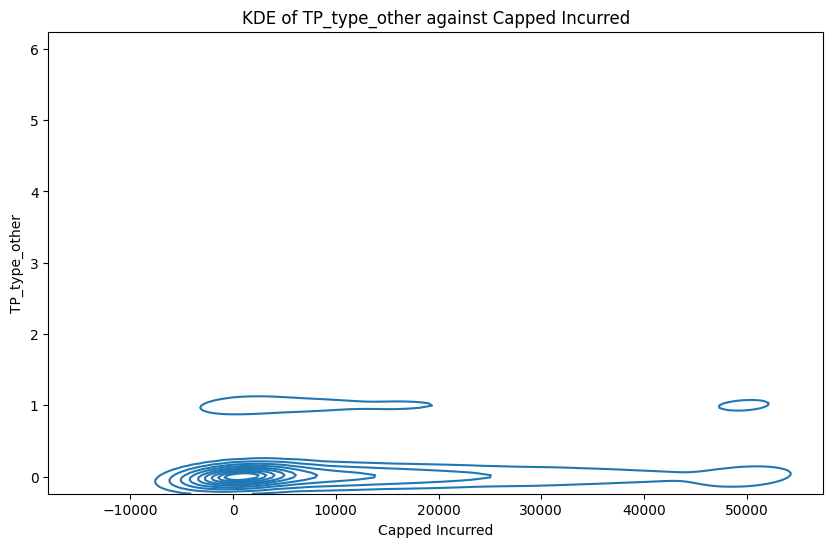

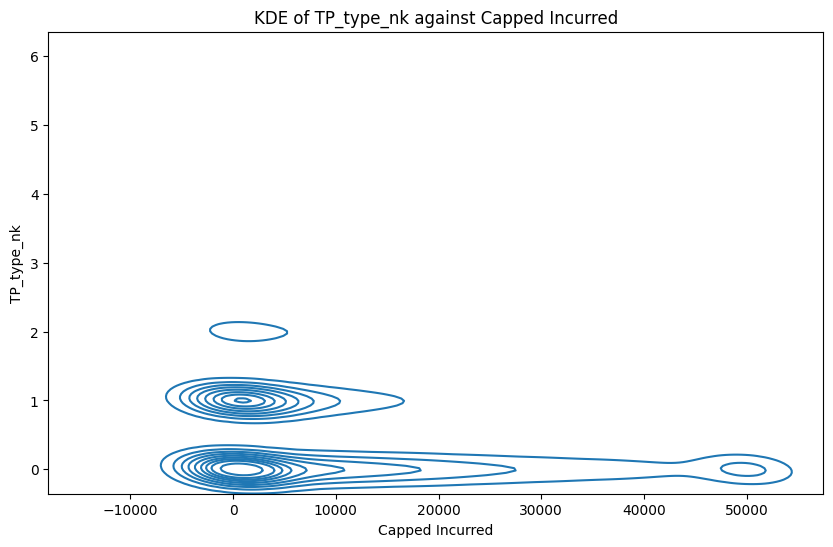

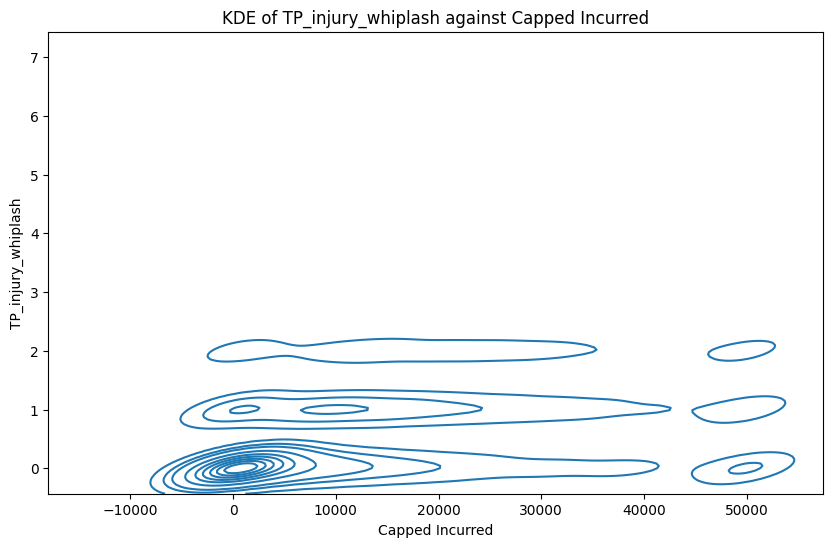

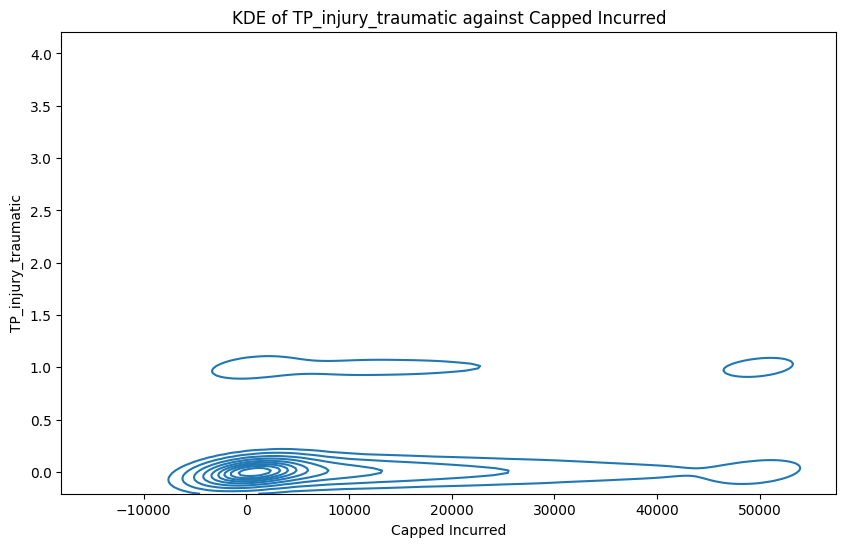

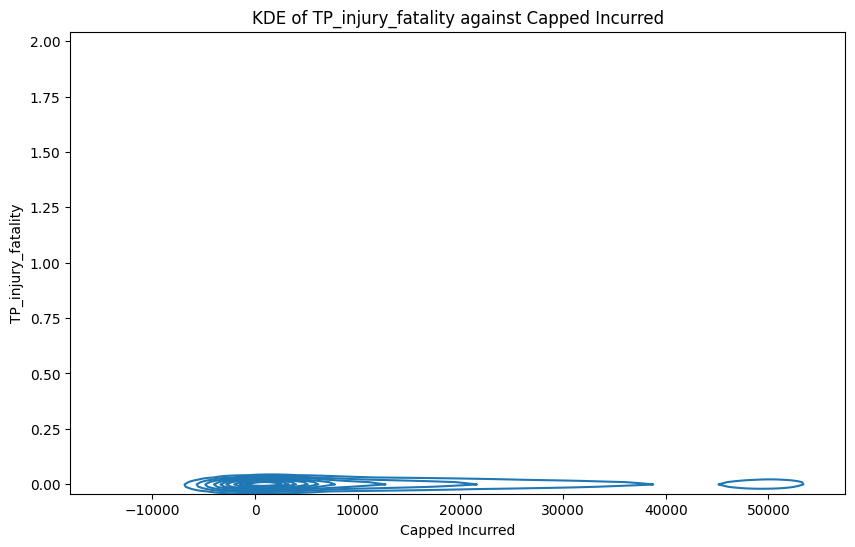

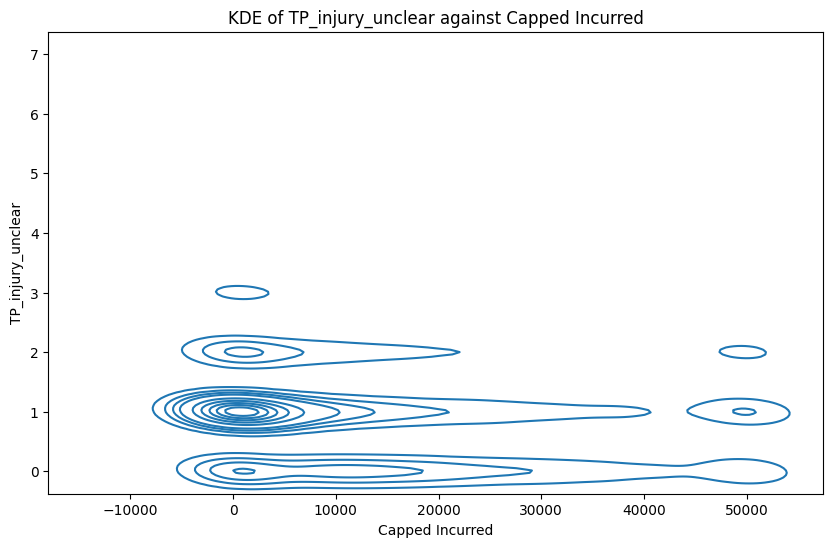

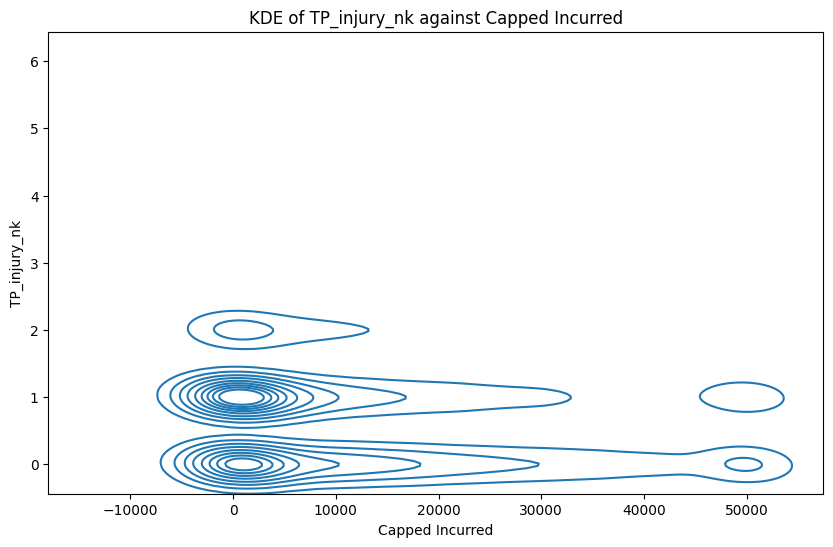

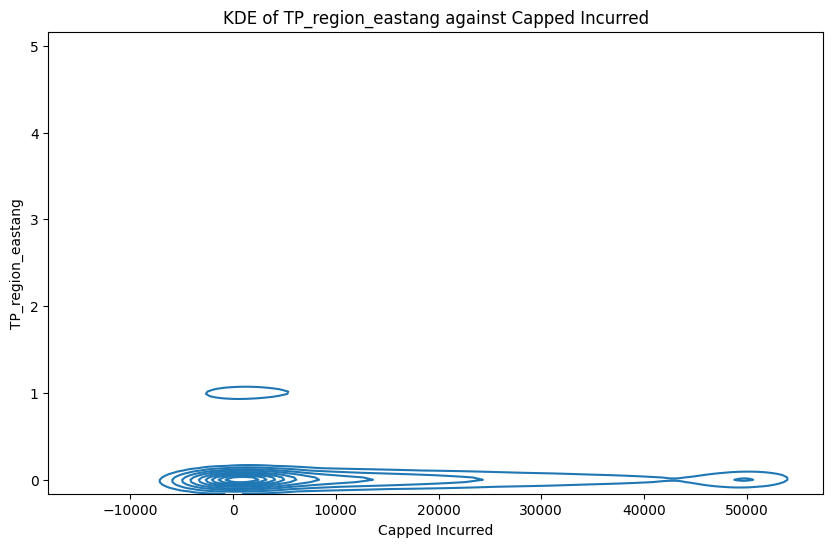

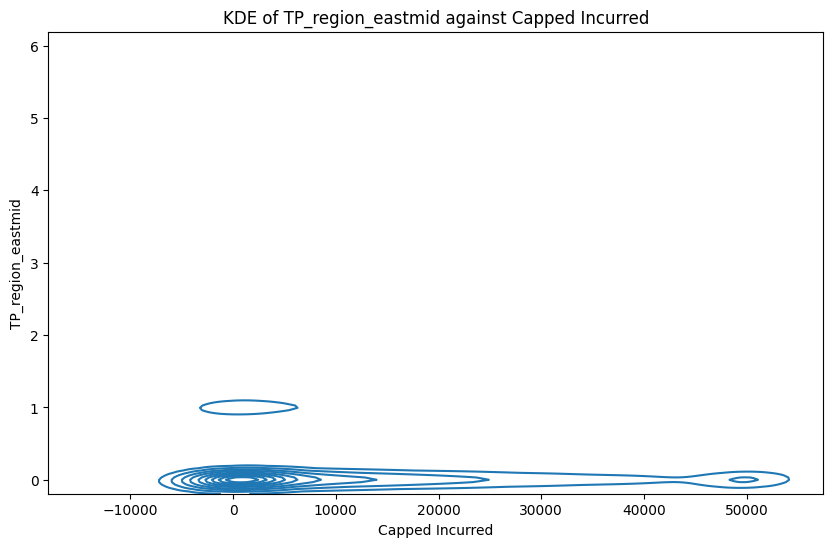

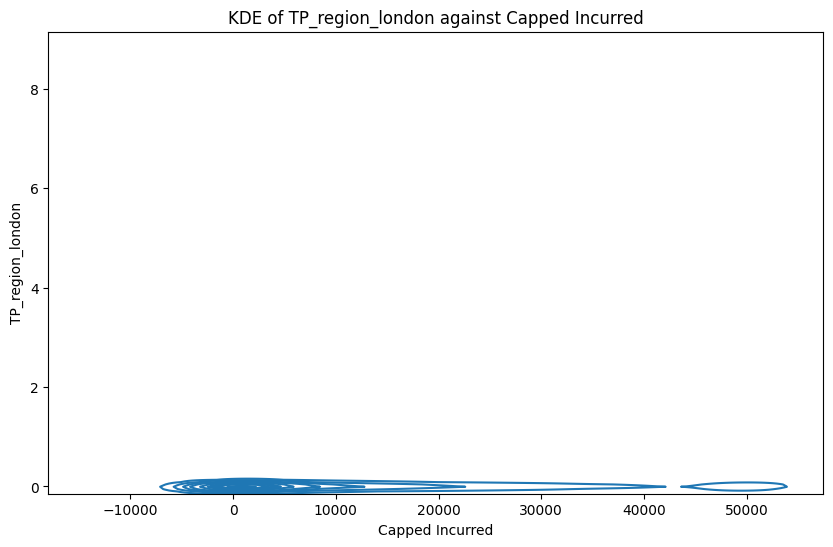

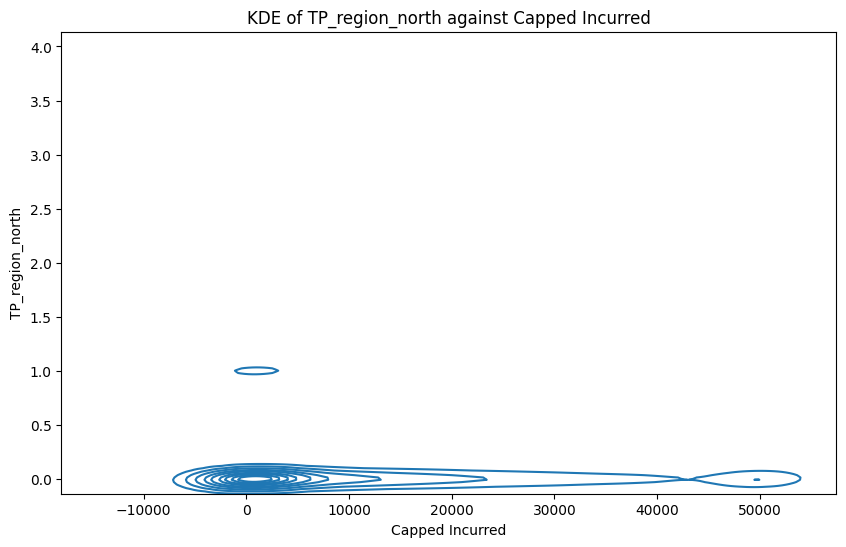

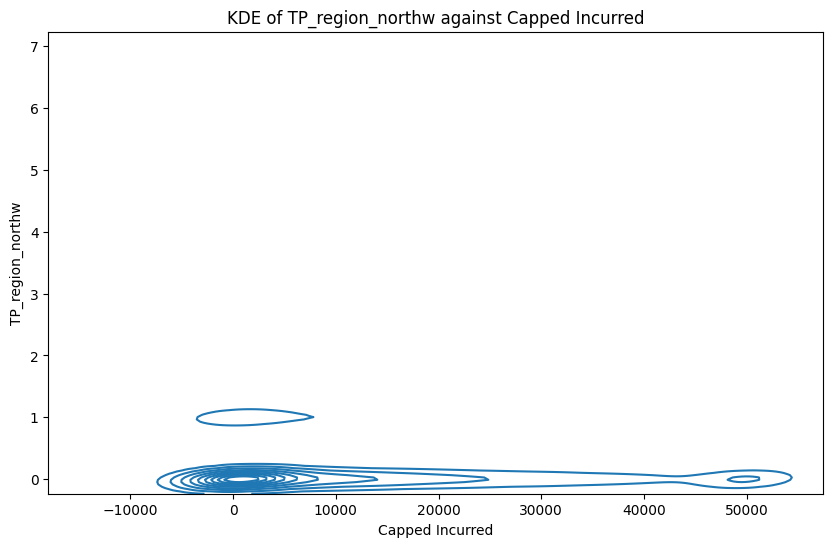

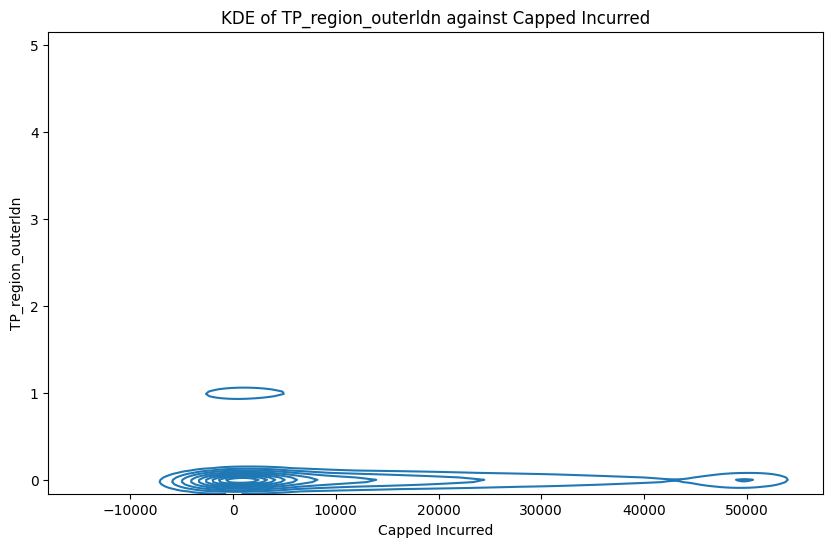

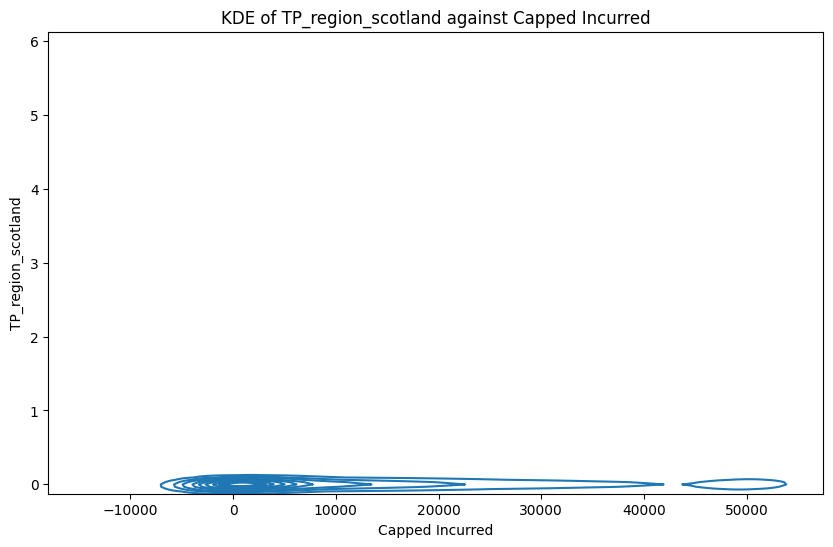

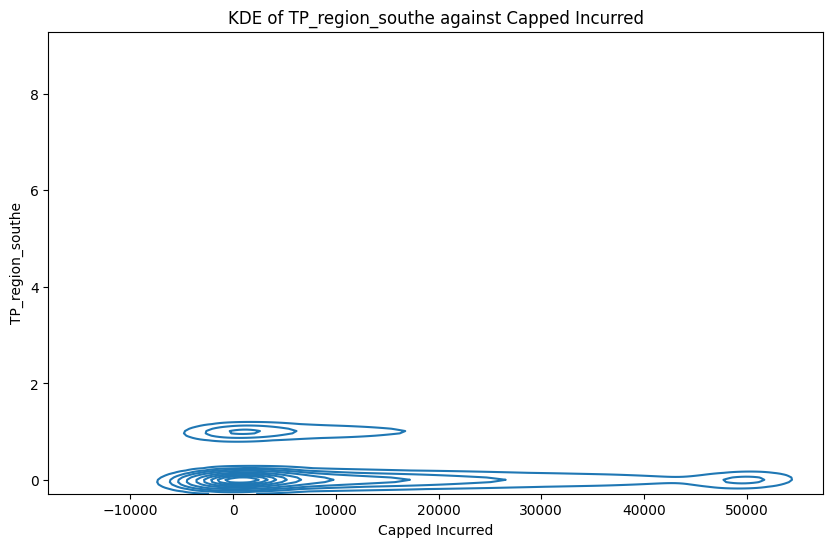

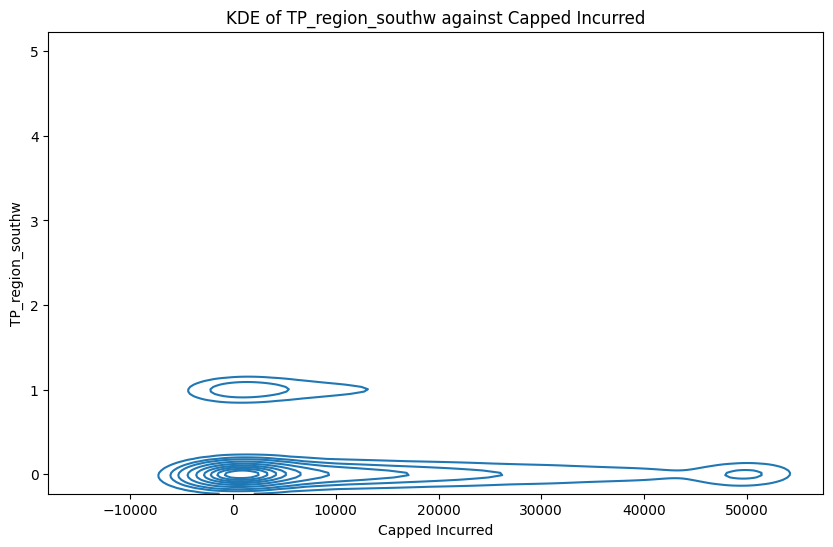

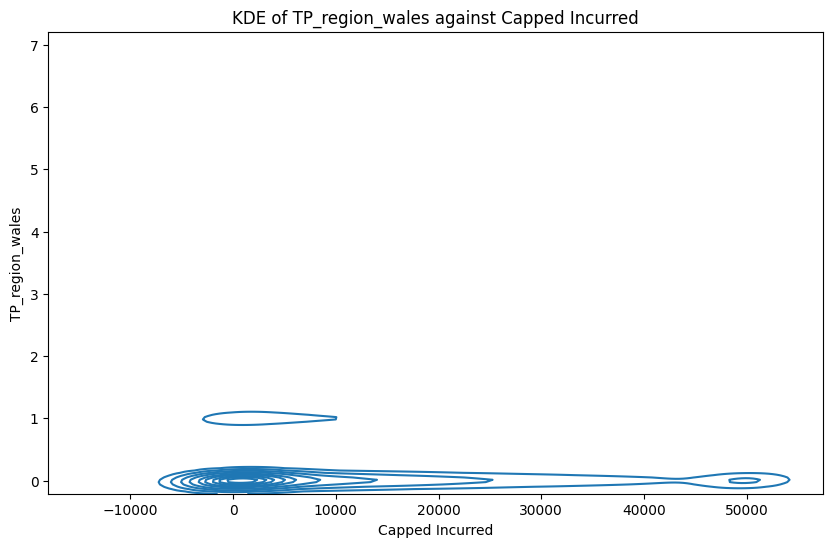

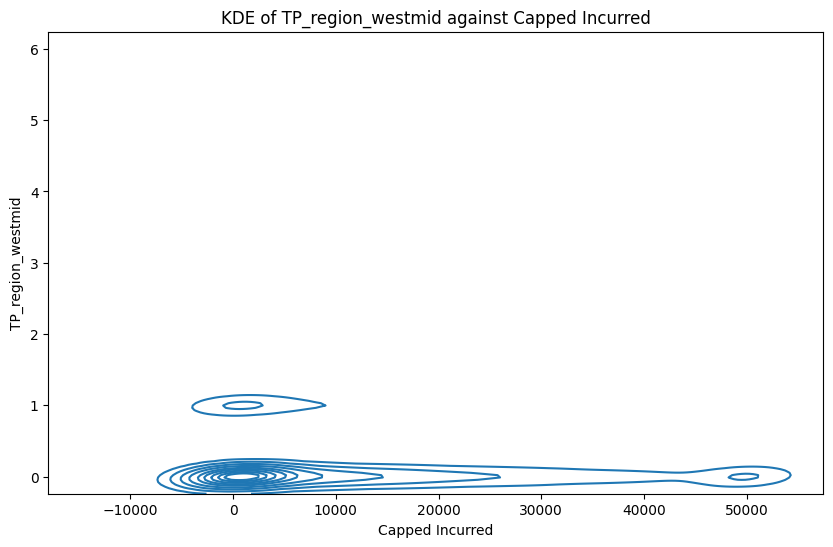

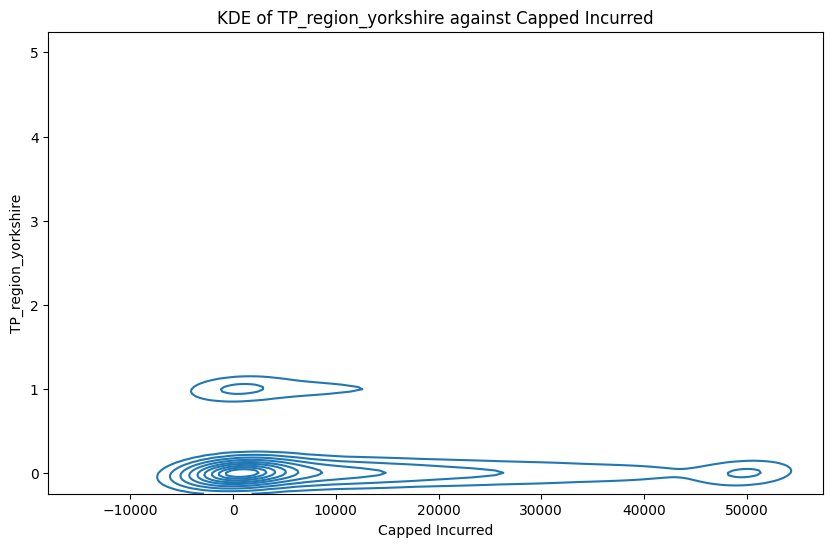

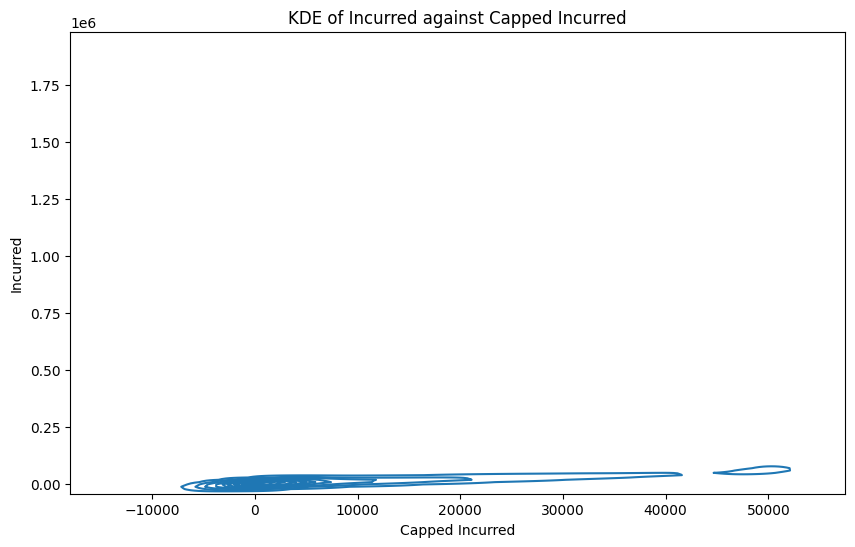

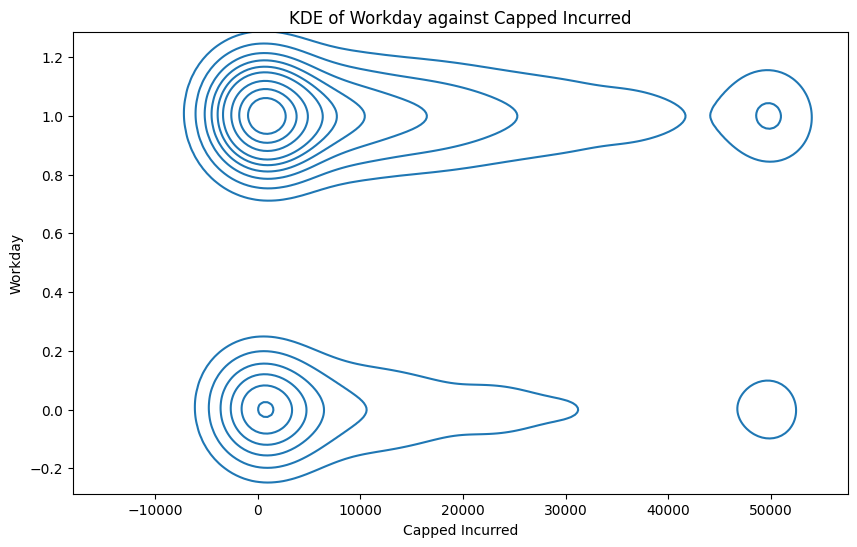

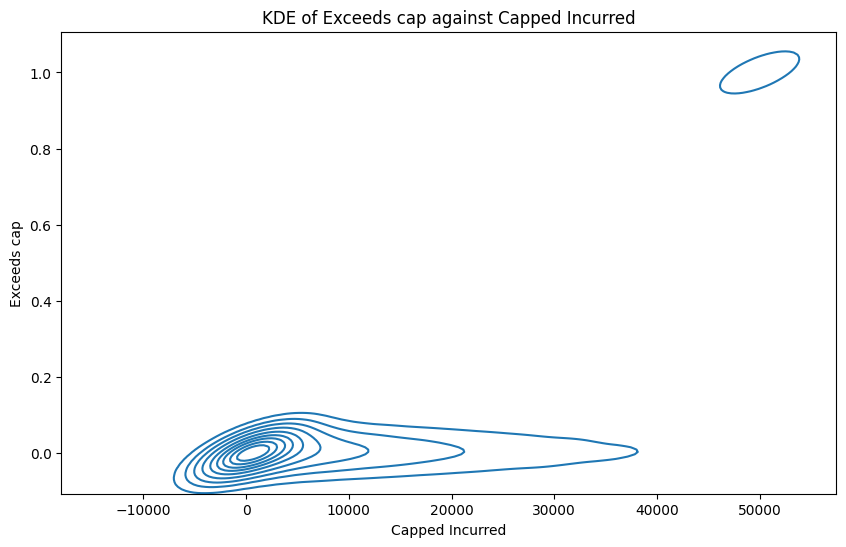

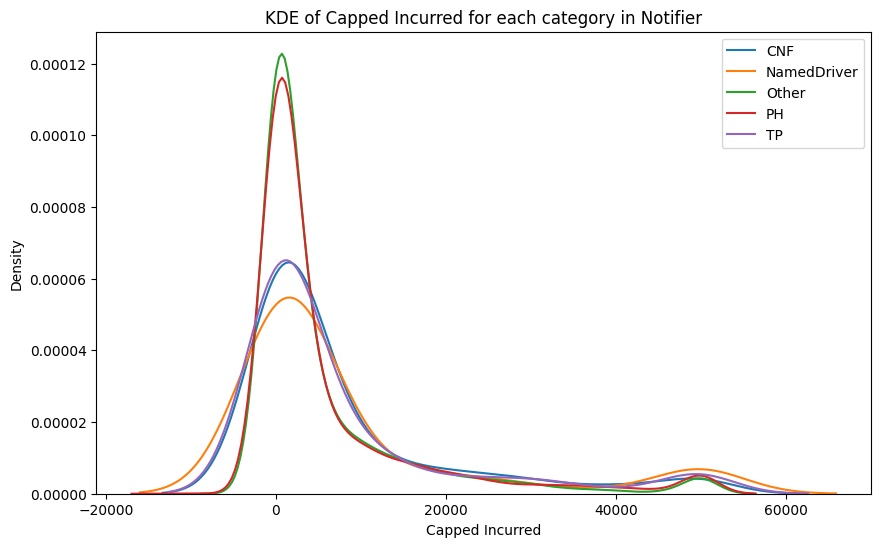

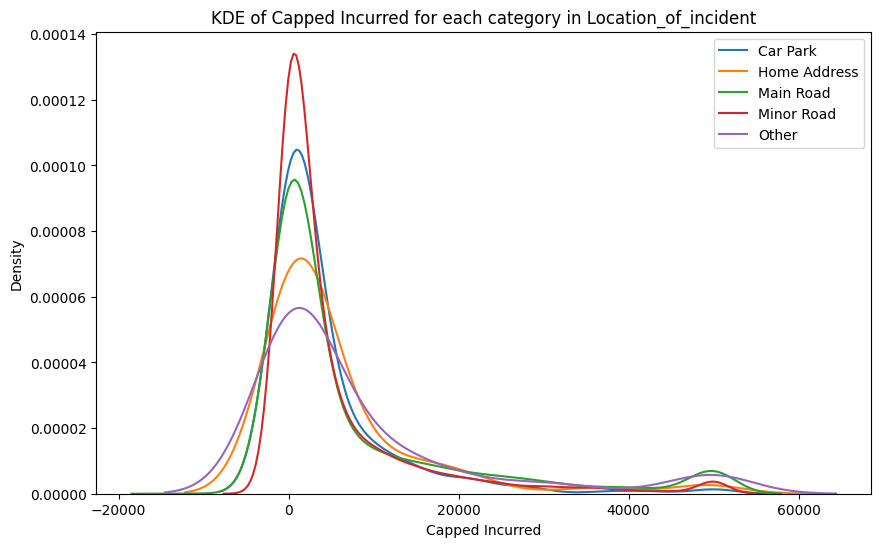

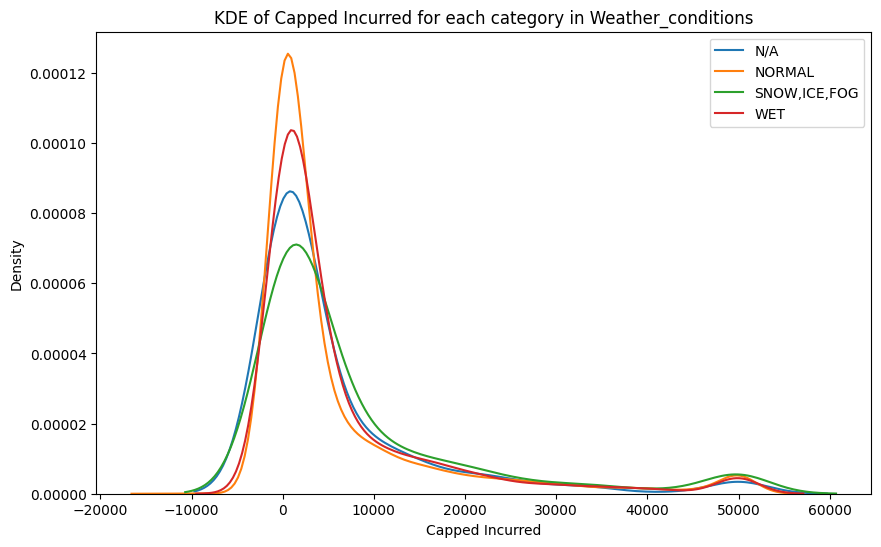

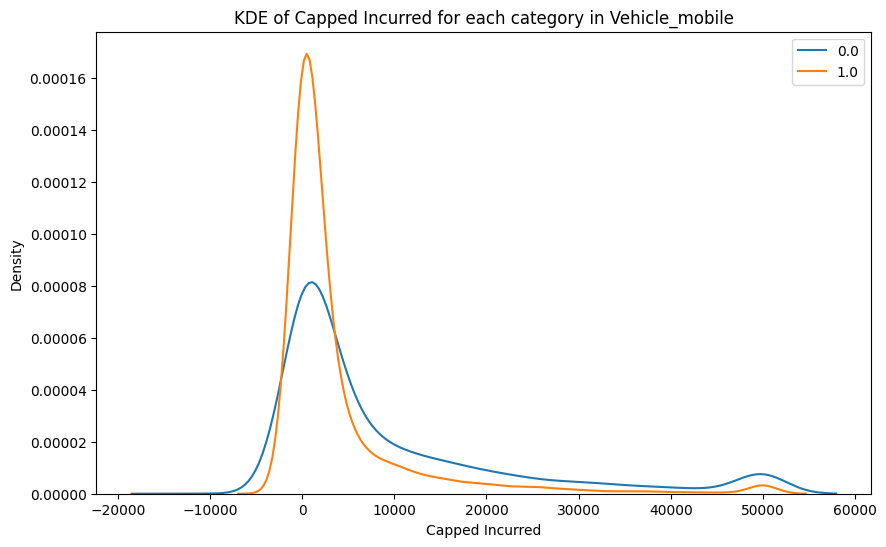

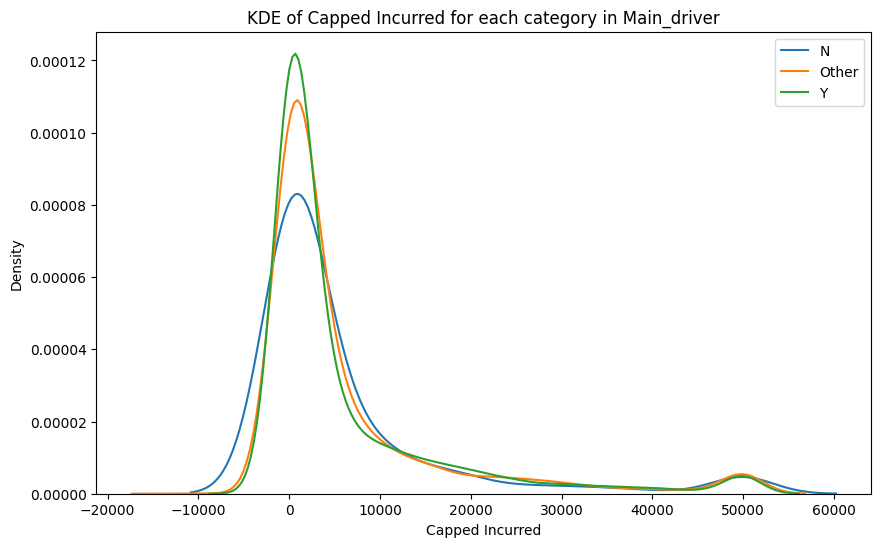

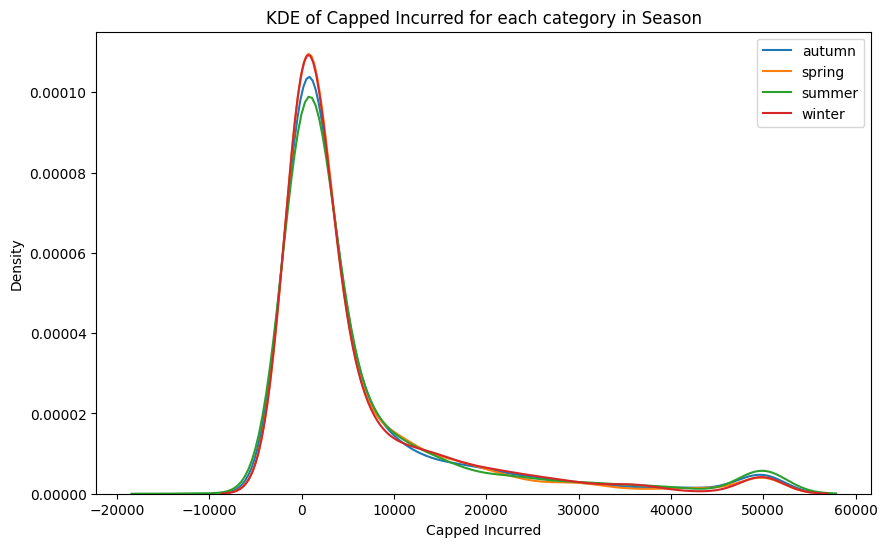

In [49]:
# List of numerical and categorical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = data.select_dtypes(include=['category']).columns.tolist()

# Remove 'Incurred' from the numerical columns list if it's there
if 'Capped Incurred' in numerical_columns:
    numerical_columns.remove('Capped Incurred')

# Plot KDE for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=data, x="Capped Incurred", y=col)
    plt.title(f'KDE of {col} against Capped Incurred')
    plt.show()

# Plot KDE for the 'Incurred' column for each category in categorical columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    for category in data[col].cat.categories:
        subset = data[data[col] == category]
        sns.kdeplot(data=subset, x="Capped Incurred", label=category)
    plt.title(f'KDE of Capped Incurred for each category in {col}')
    plt.legend()
    plt.show()


# can replace outliers with a median using z-scores (basically how many stds away from mean)
def replace_outliers_zscore_median(series, threshold=5):
    z_scores = (series - series.mean()) / series.std()
    median = series.median()
    return series.mask(abs(z_scores) > threshold, median) # series.mask(abs(z_scores) > threshold) returns NaN
# Apply the function to replace outliers in the DataFrame
train['Height'] = replace_outliers_zscore_median(train['Height'])

In [ ]:
# check cat variables and cardinality